In [5]:
# custom functions
from load_data import load_data
from col_list import col_list
from clean_data import clean_data
from hospitals_subplots import hospitals_subplots
from hospitals_plot import hospitals_plot
from hyp_test import hyp_test
from params_to_pval import params_to_pval

# modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
from datetime import datetime
import scipy.stats as stats
from math import sqrt
import itertools
from datetime import timedelta
import numpy as np

warnings.filterwarnings('ignore')

pvalue = 0.386


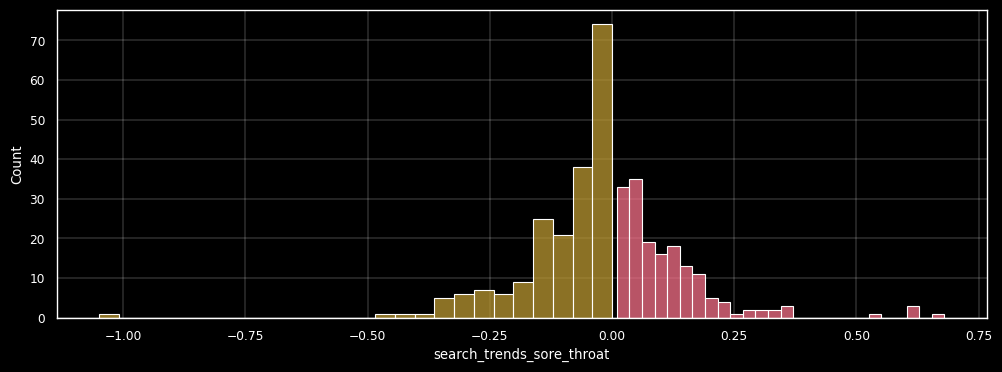

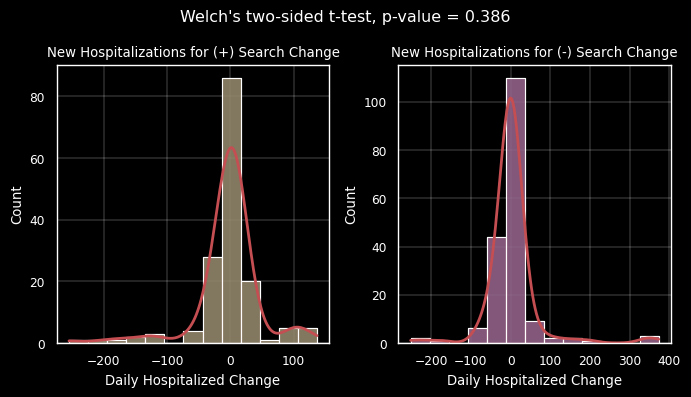

pvalue = 0.597


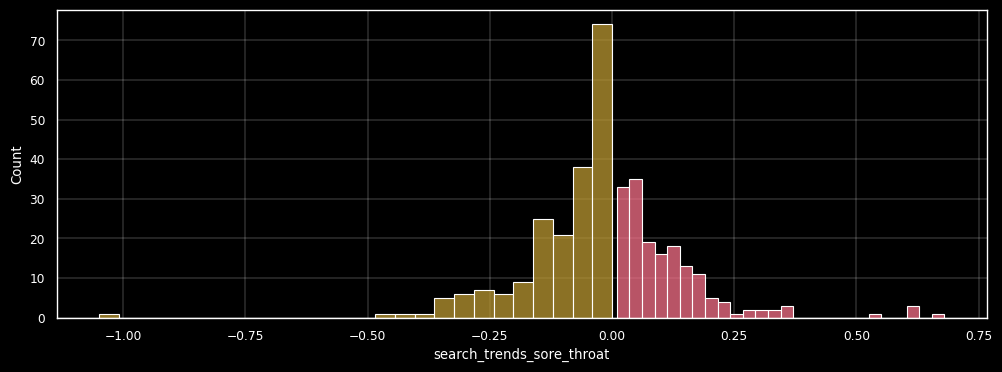

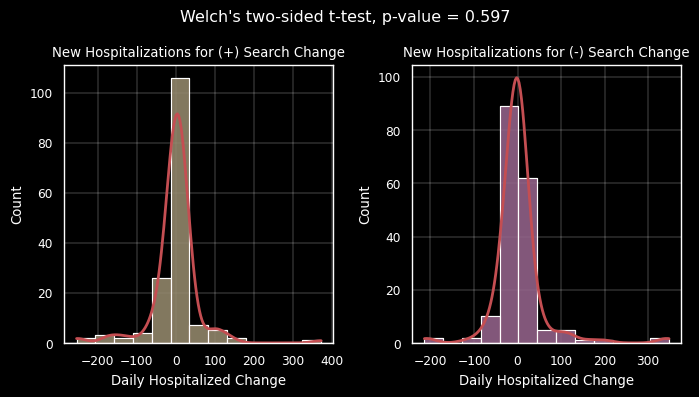

pvalue = 0.789


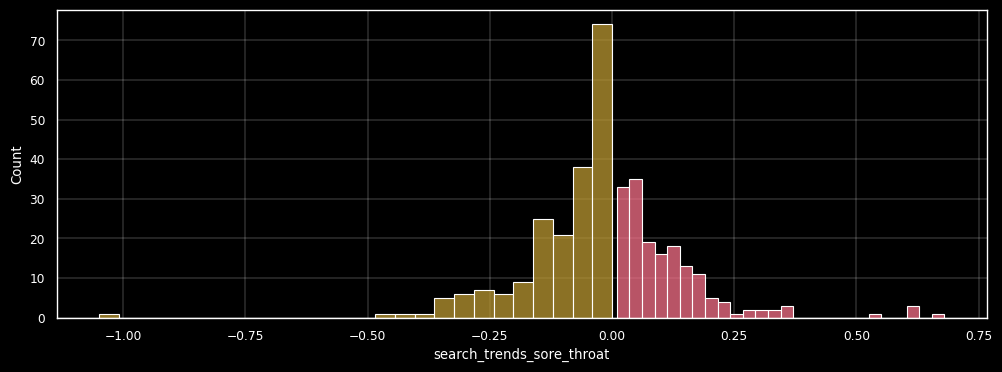

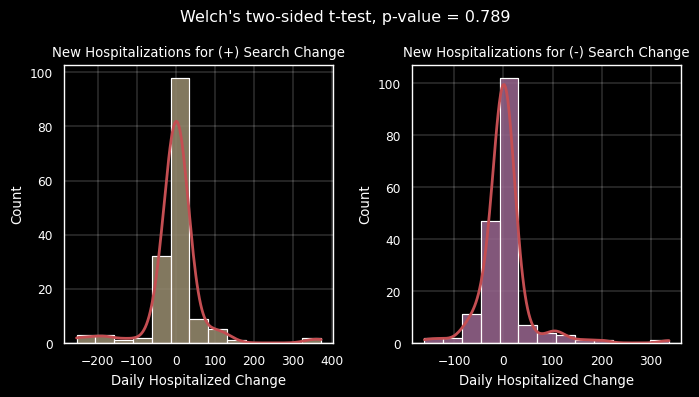

pvalue = 0.96


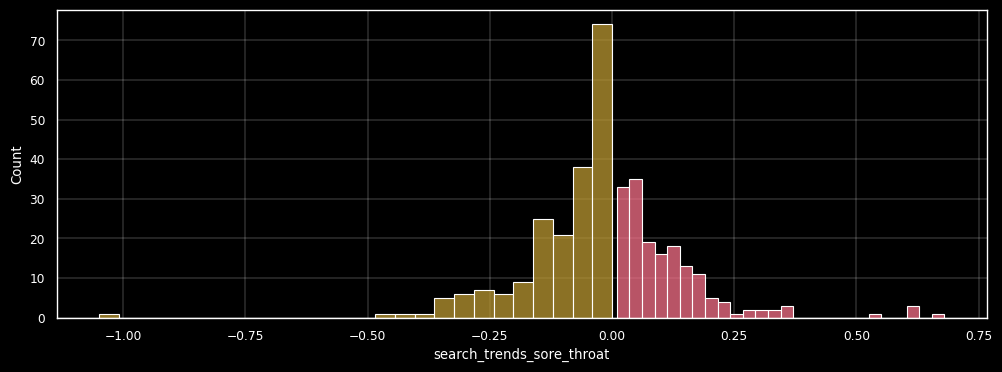

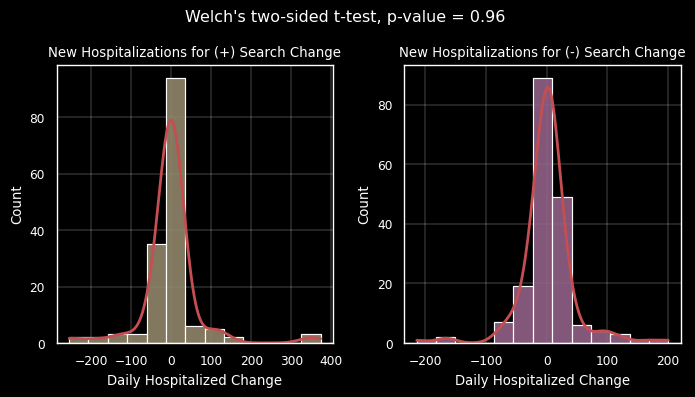

pvalue = 0.962


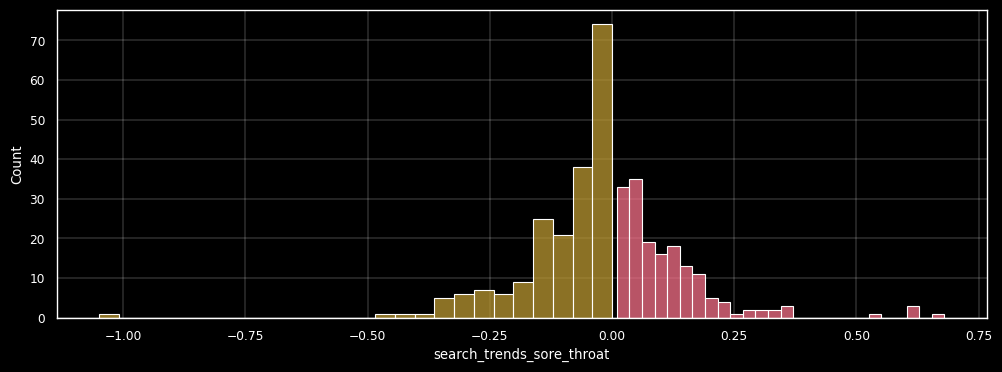

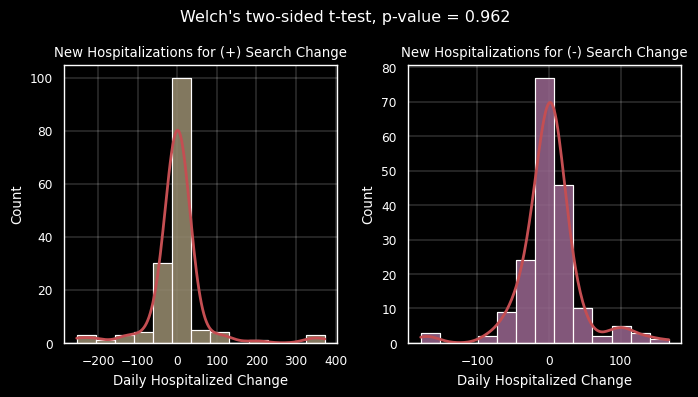

pvalue = 0.801


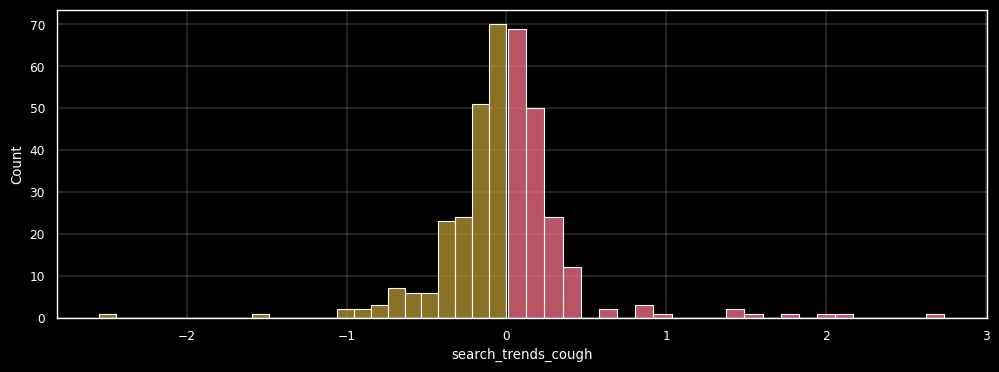

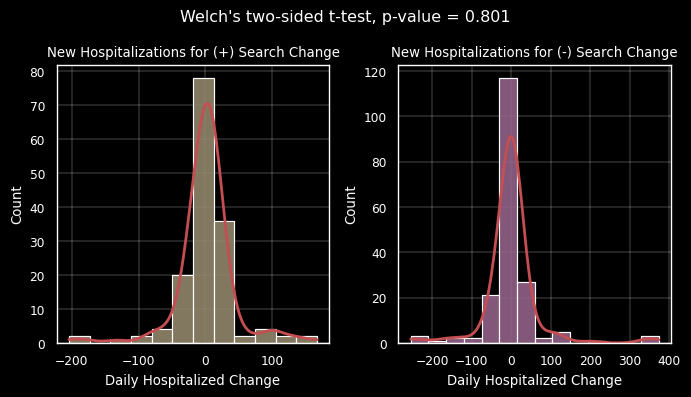

pvalue = 0.588


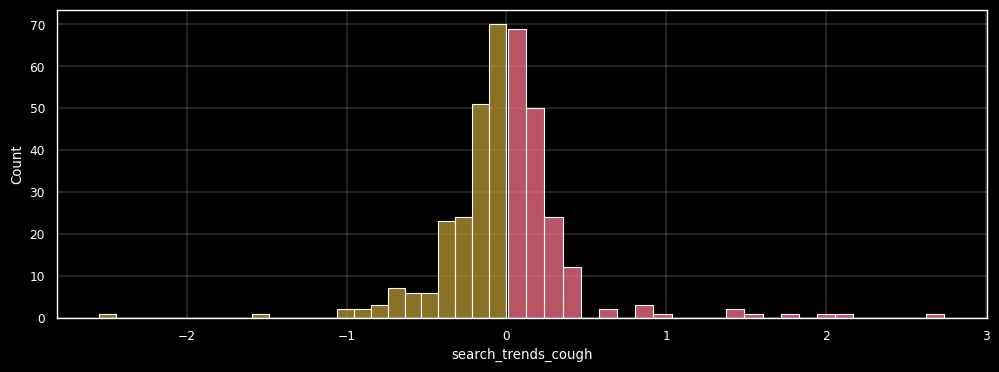

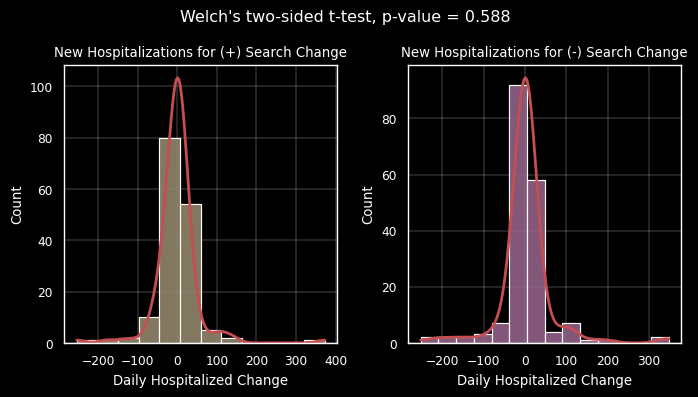

pvalue = 0.499


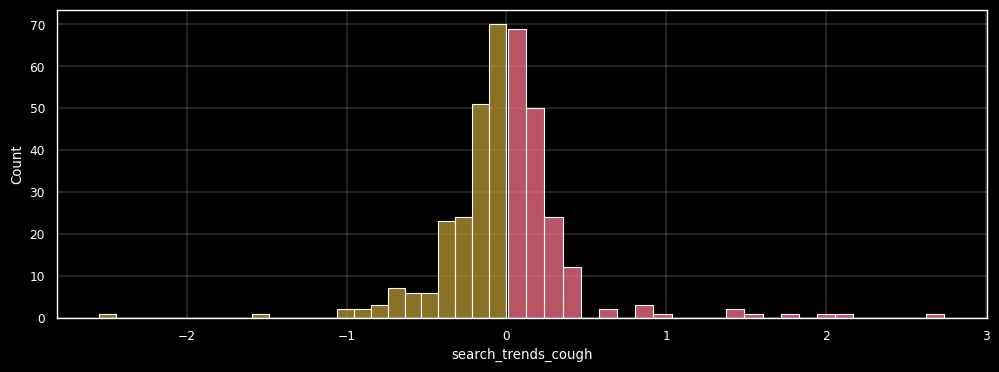

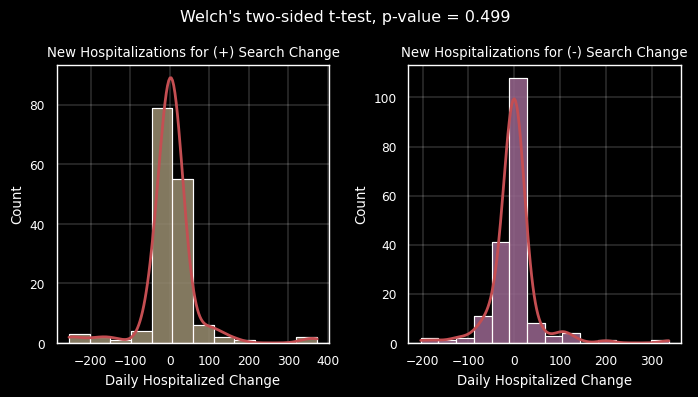

pvalue = 0.071


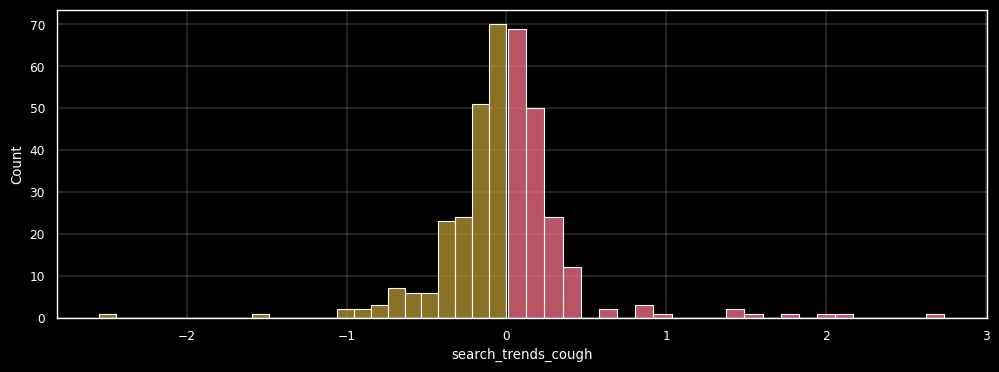

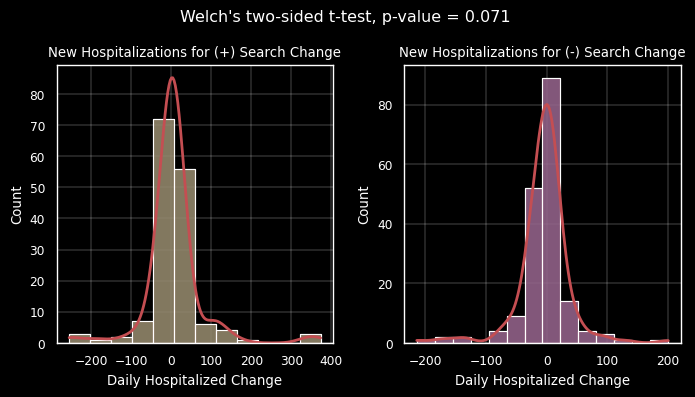

pvalue = 0.402


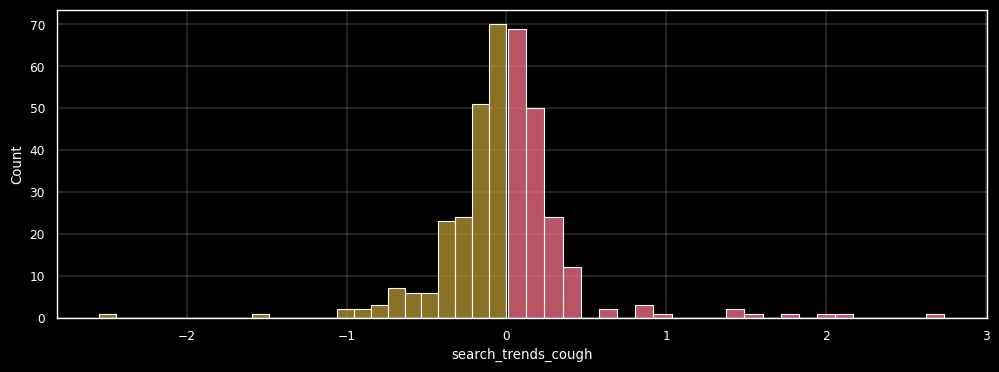

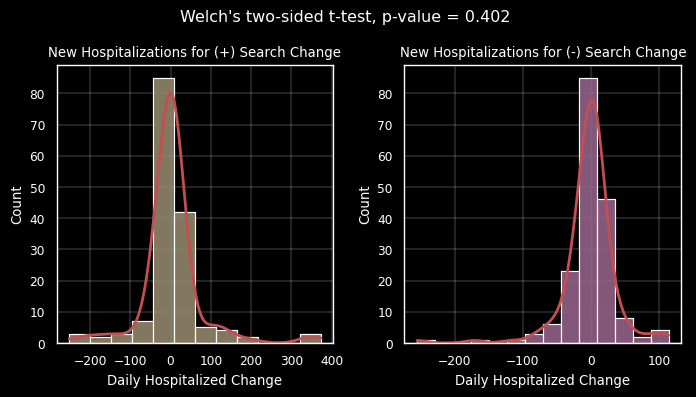

pvalue = 0.014


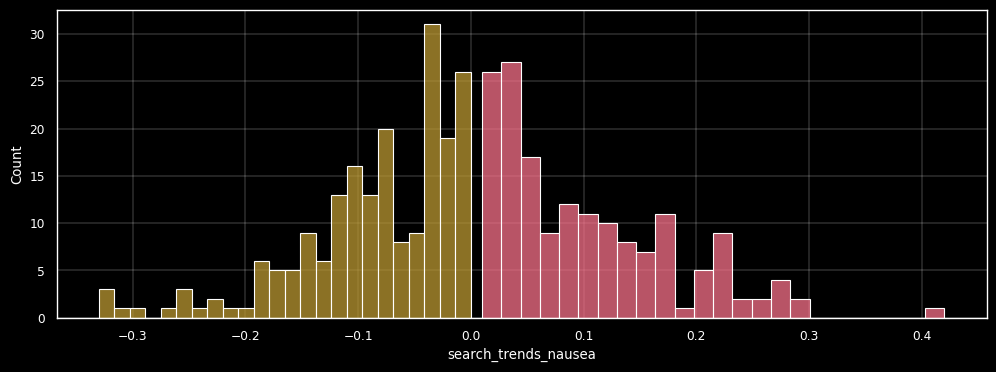

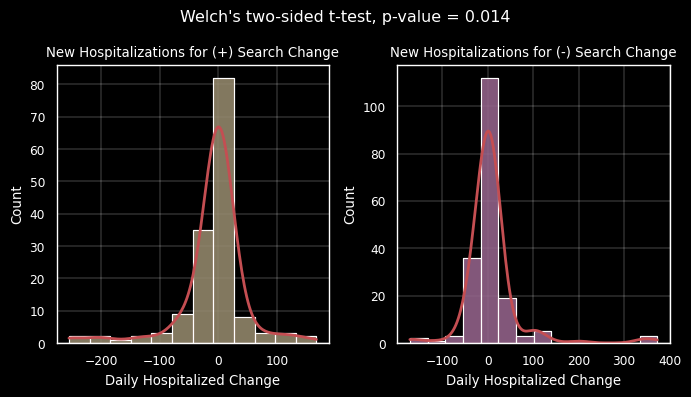

pvalue = 0.005


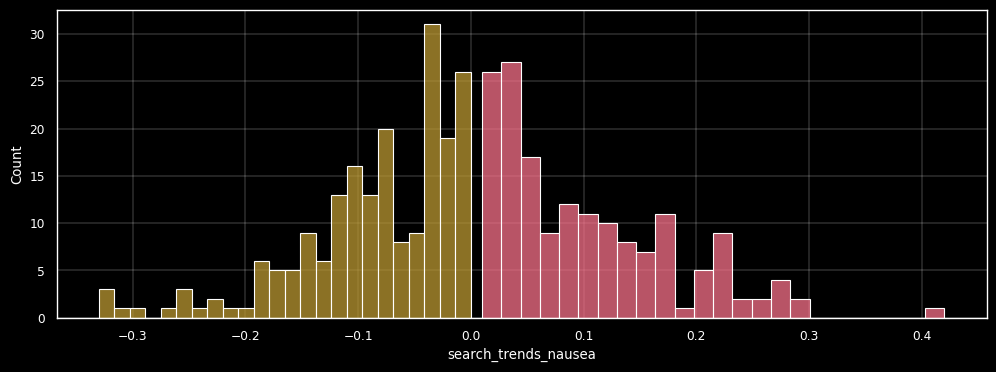

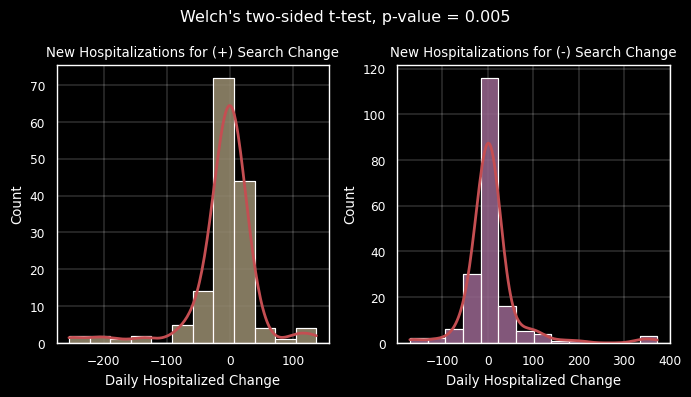

pvalue = 0.138


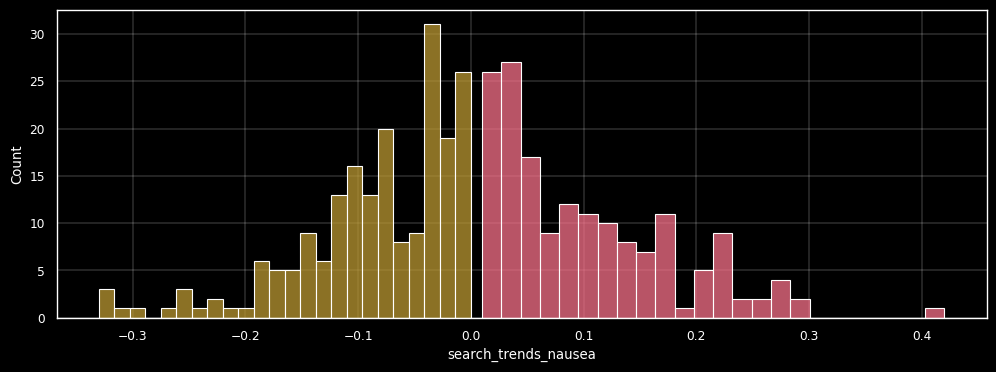

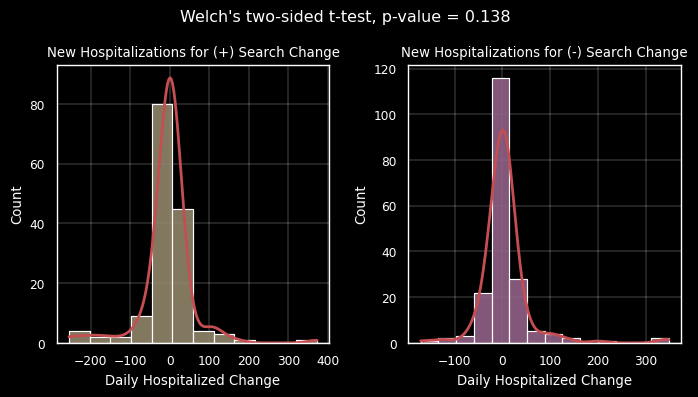

pvalue = 0.12


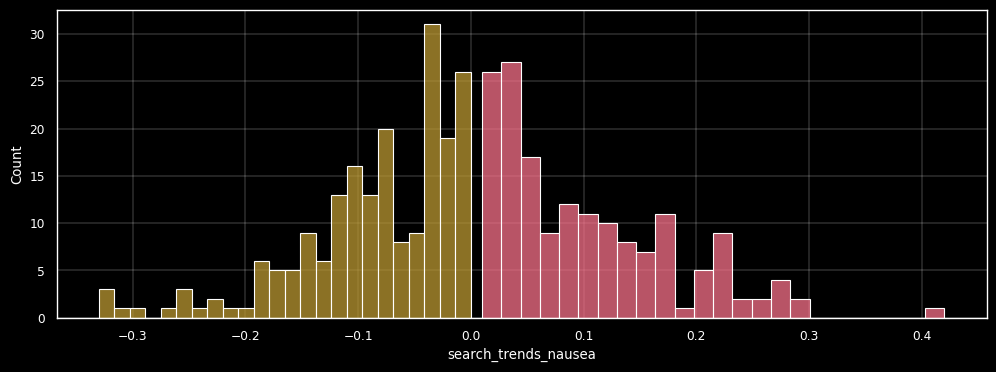

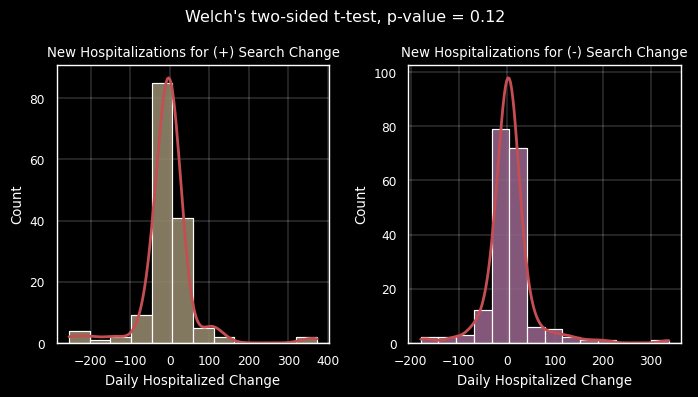

pvalue = 0.955


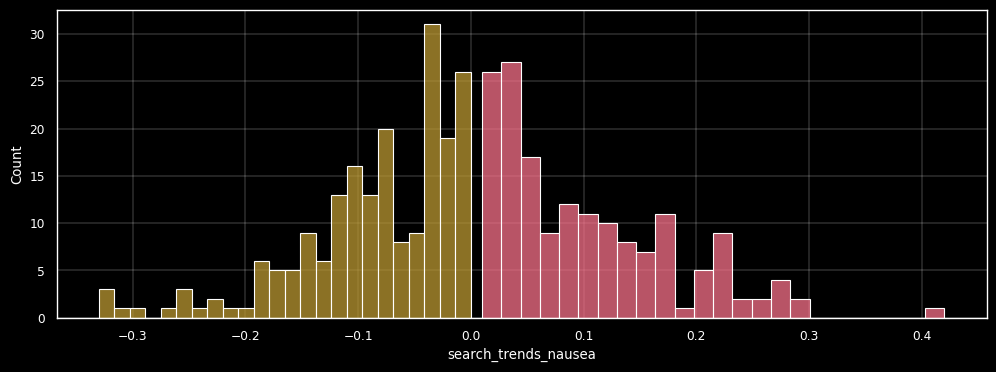

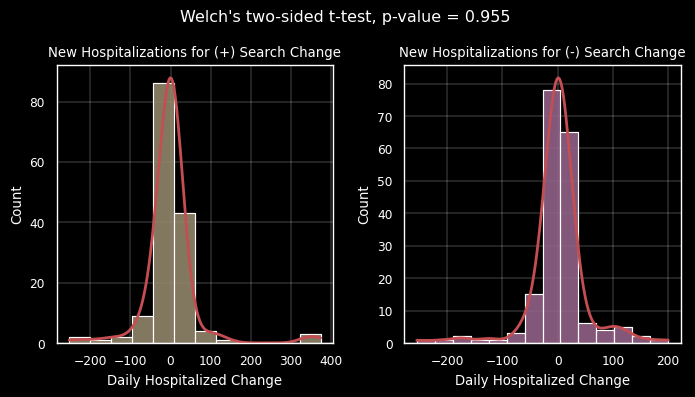

pvalue = 0.0


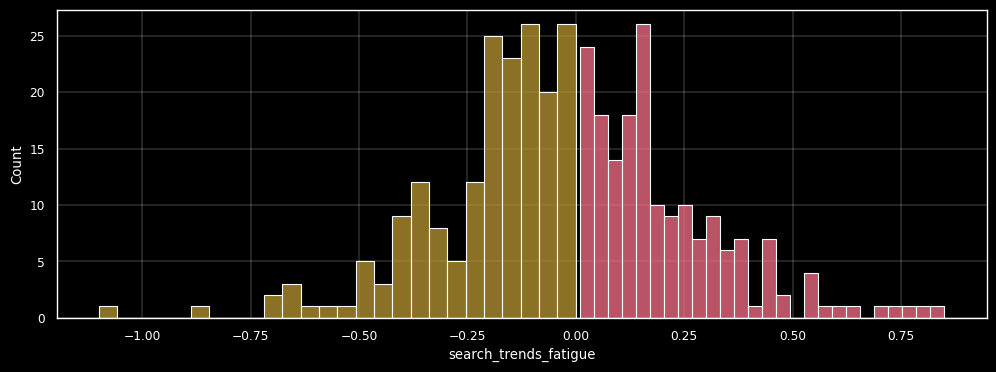

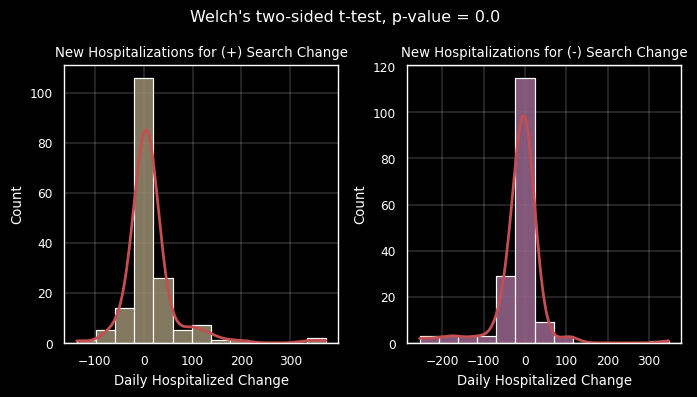

pvalue = 0.001


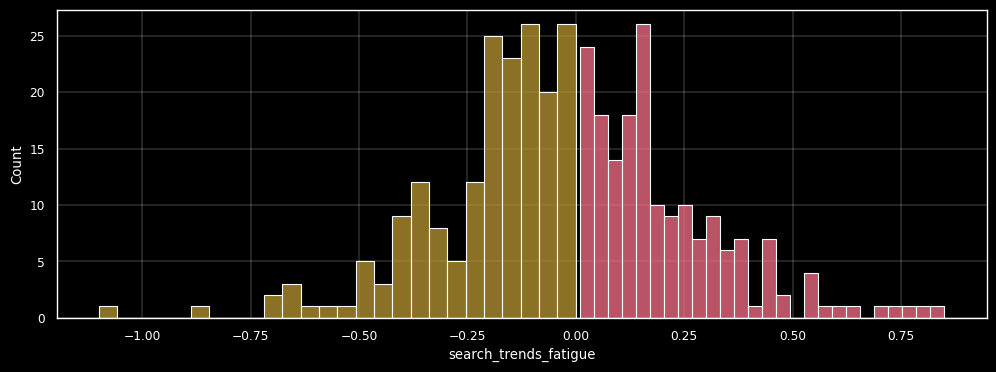

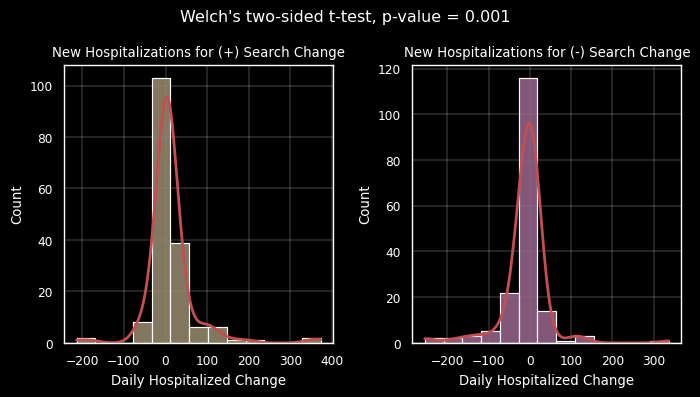

pvalue = 0.011


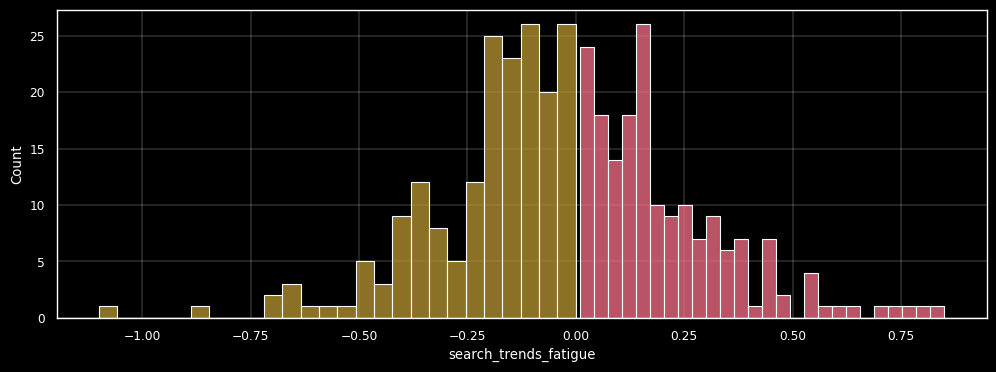

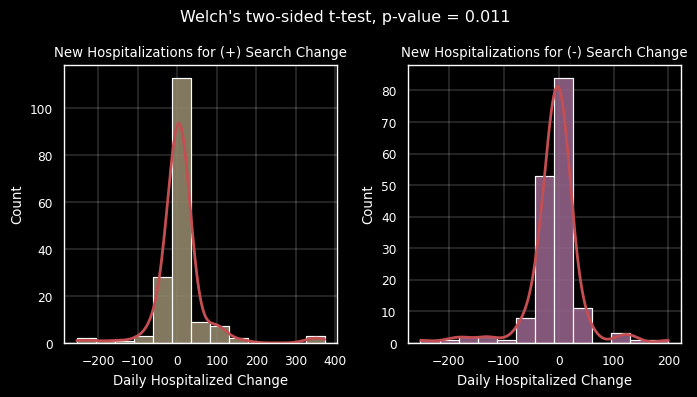

pvalue = 0.003


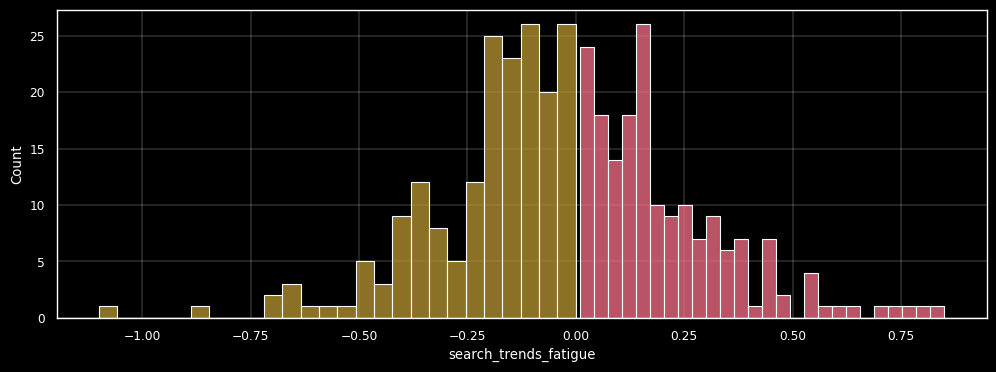

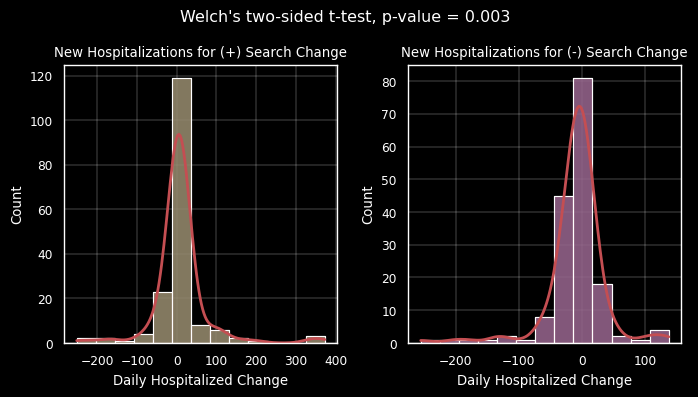

pvalue = 0.004


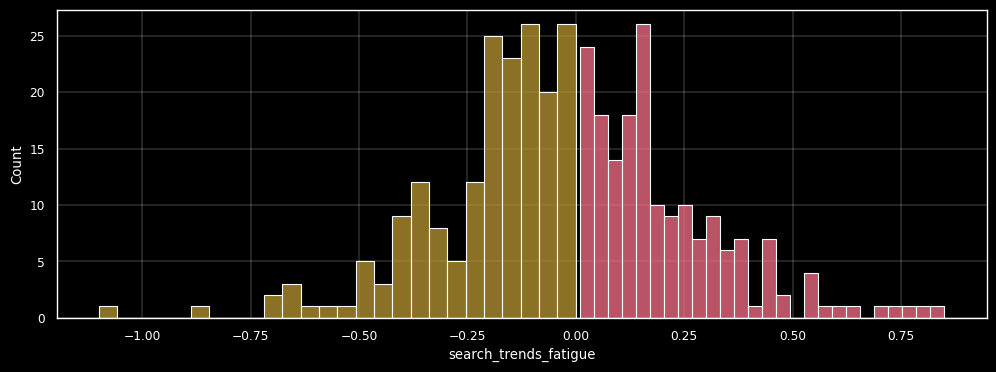

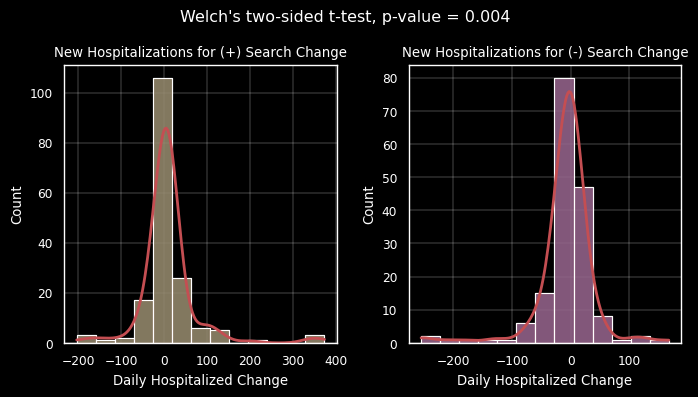

pvalue = 0.0


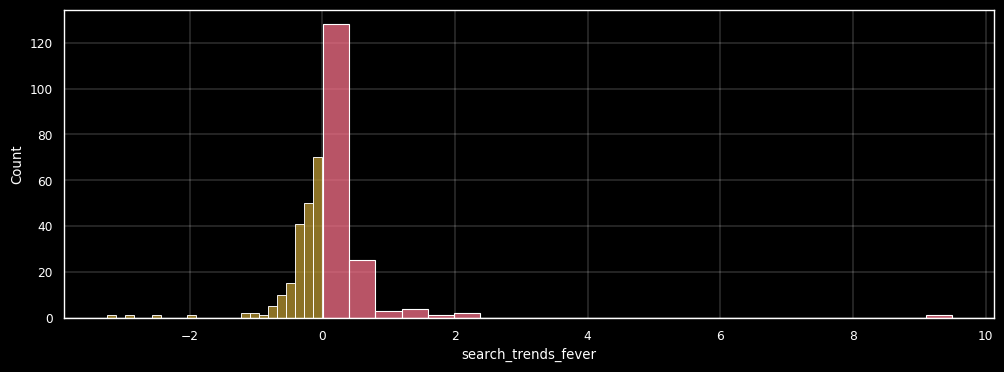

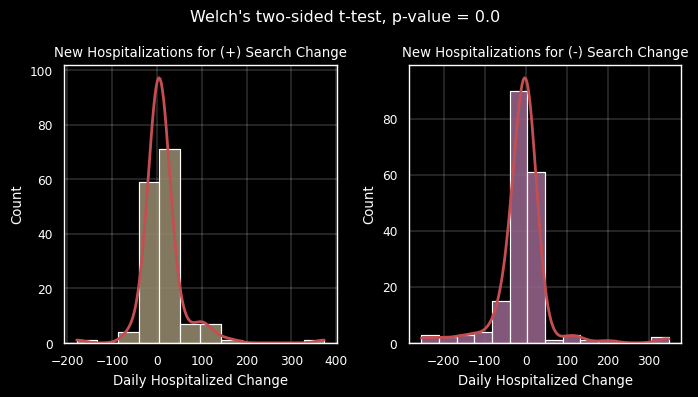

pvalue = 0.001


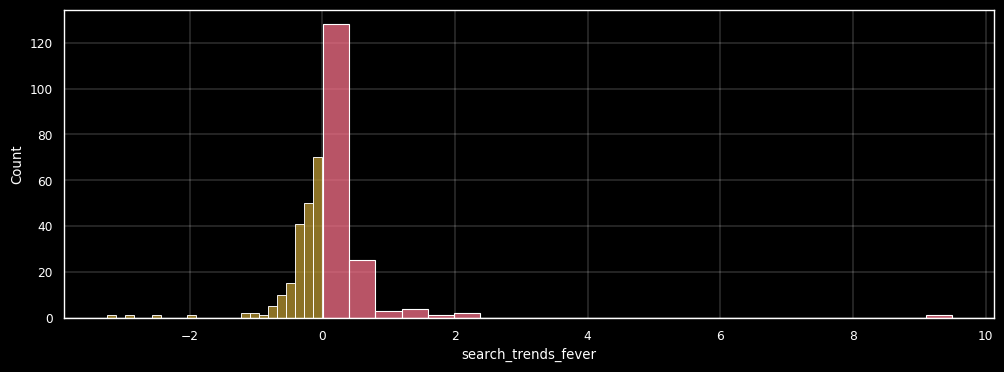

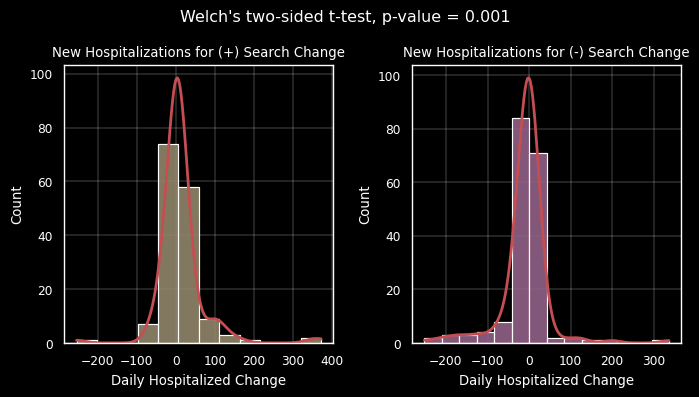

pvalue = 0.0


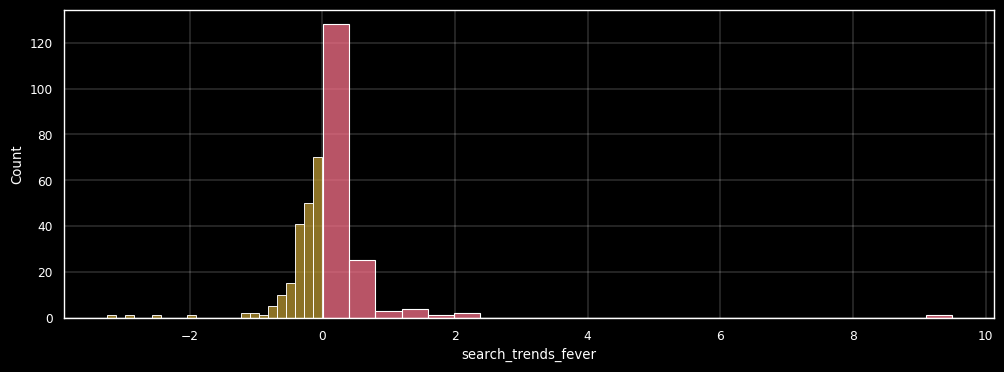

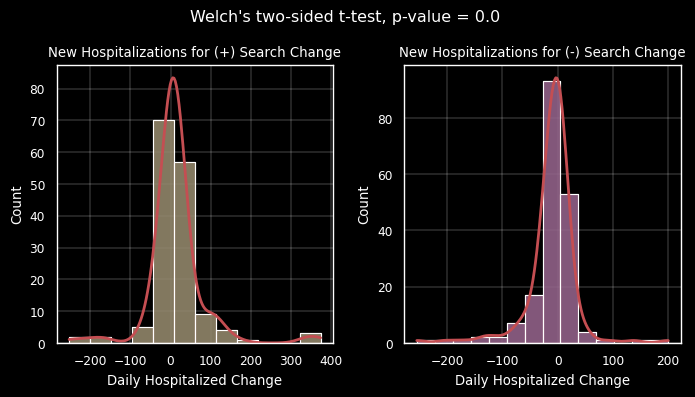

pvalue = 0.006


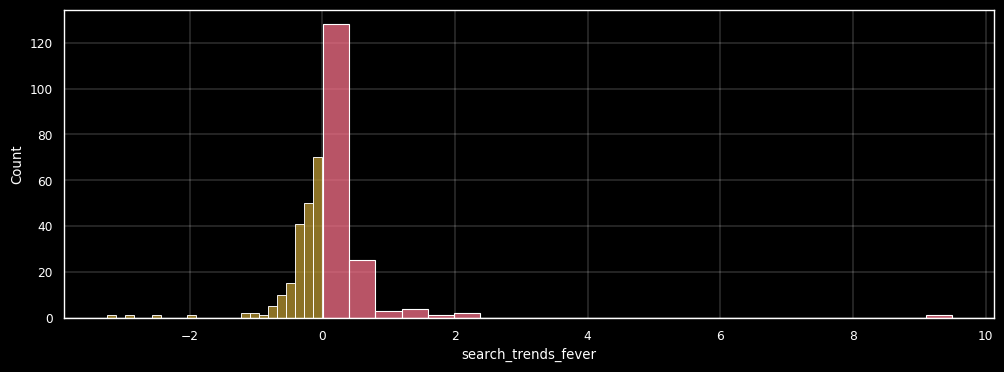

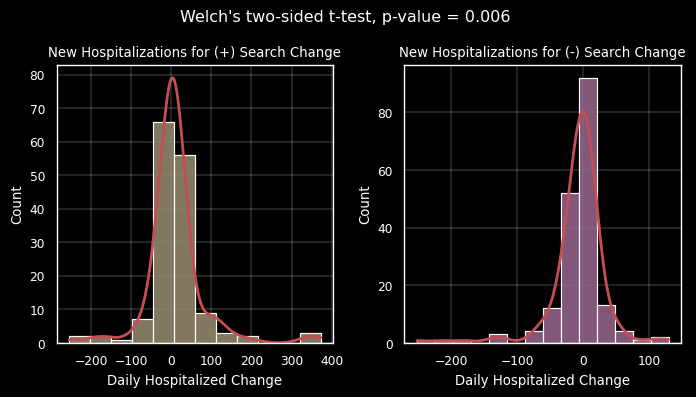

pvalue = 0.332


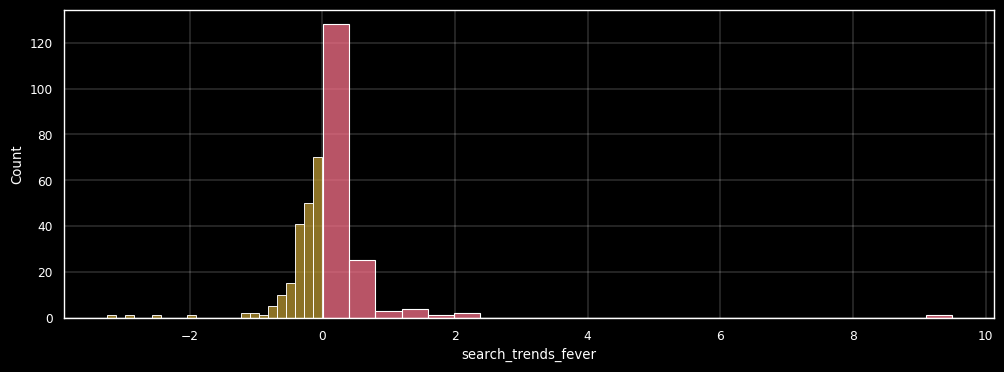

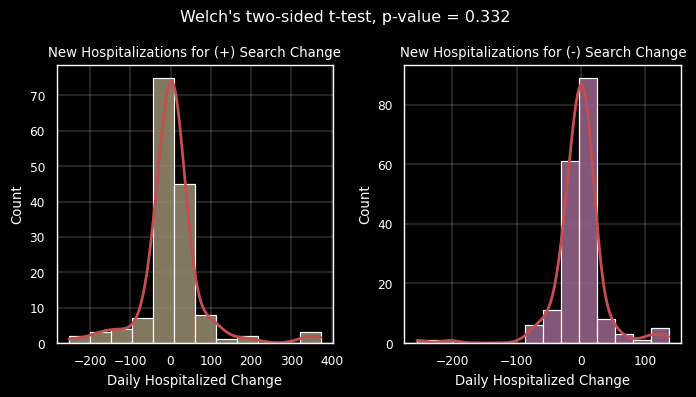

pvalue = 0.836


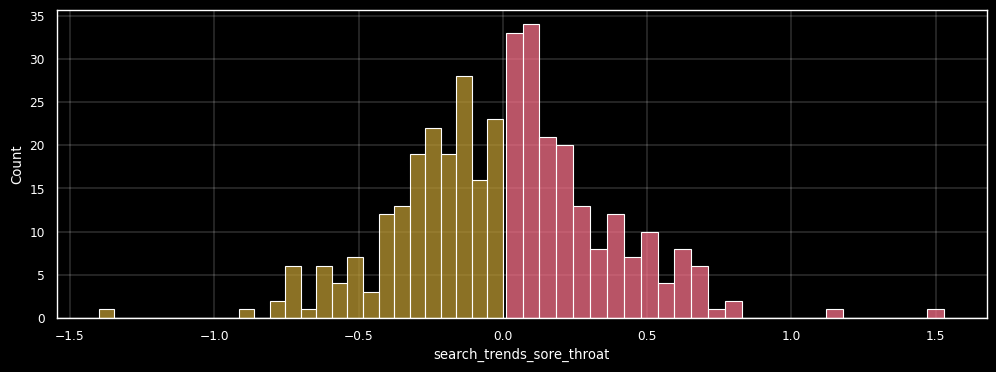

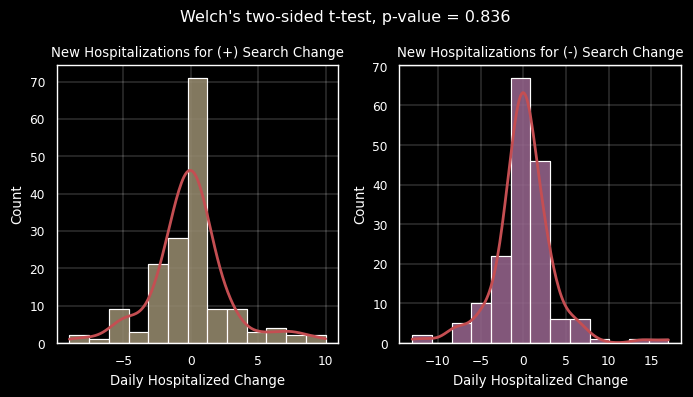

pvalue = 0.084


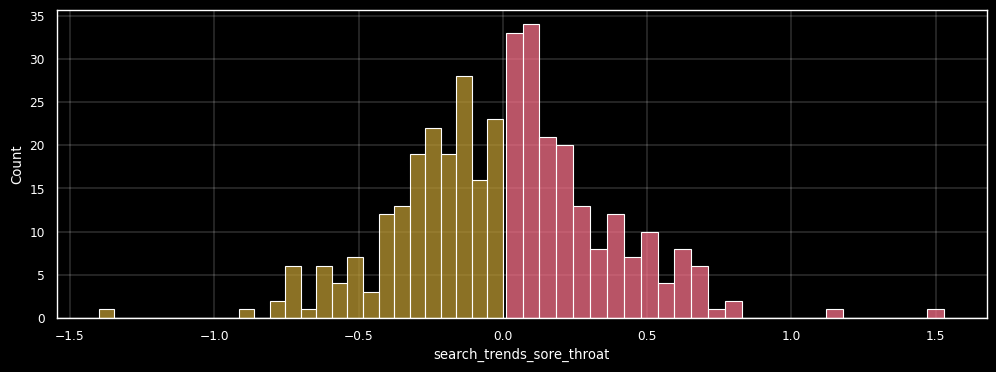

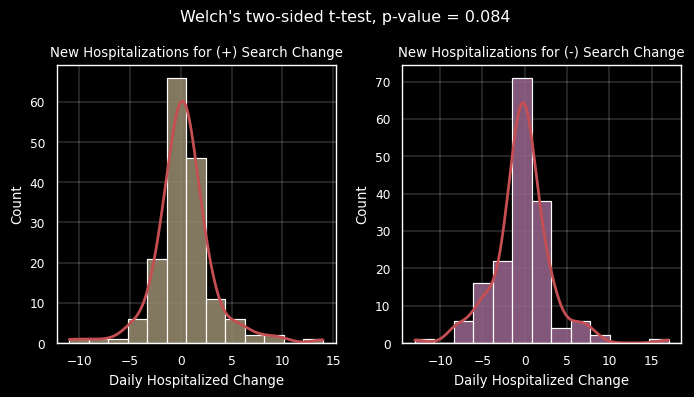

pvalue = 0.535


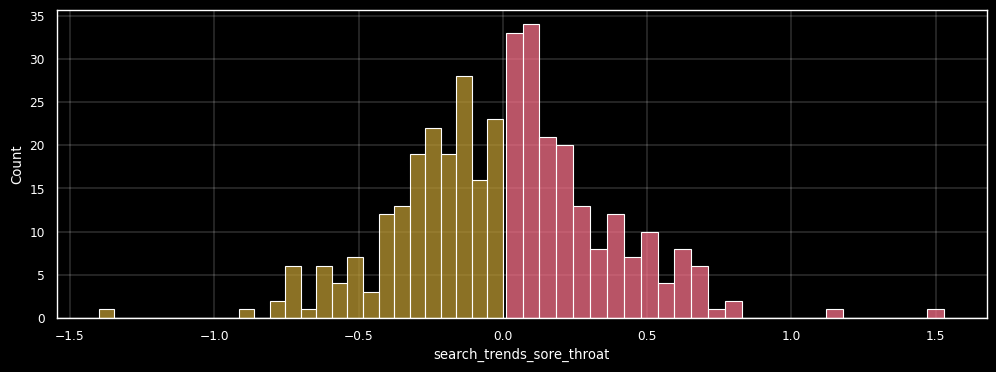

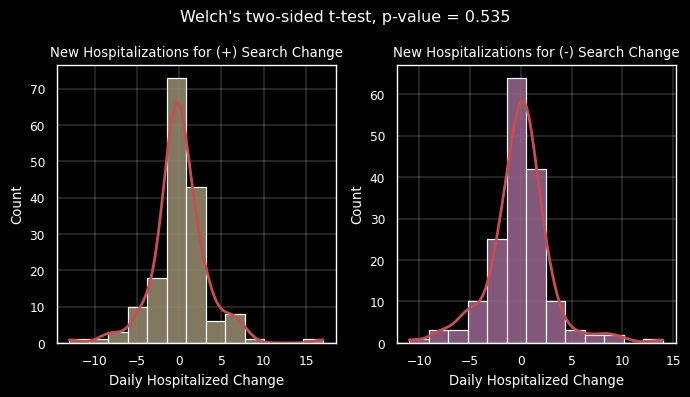

pvalue = 0.388


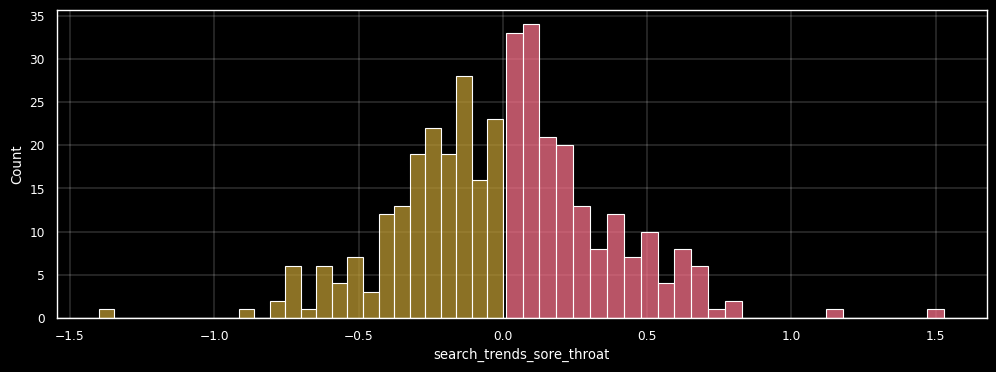

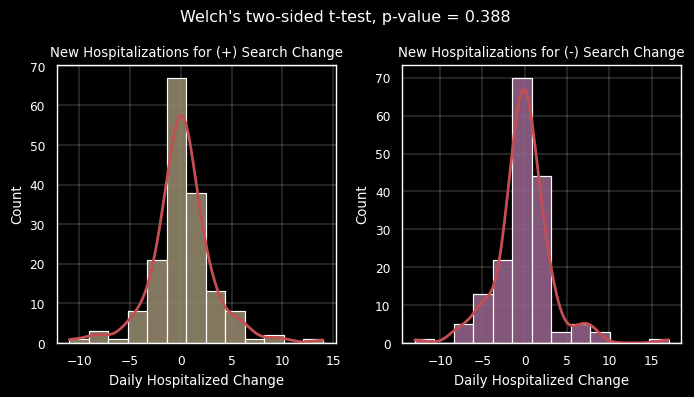

pvalue = 0.317


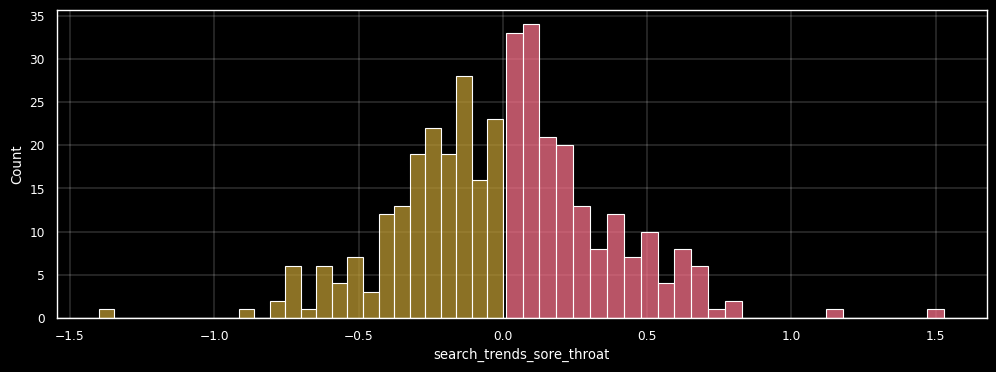

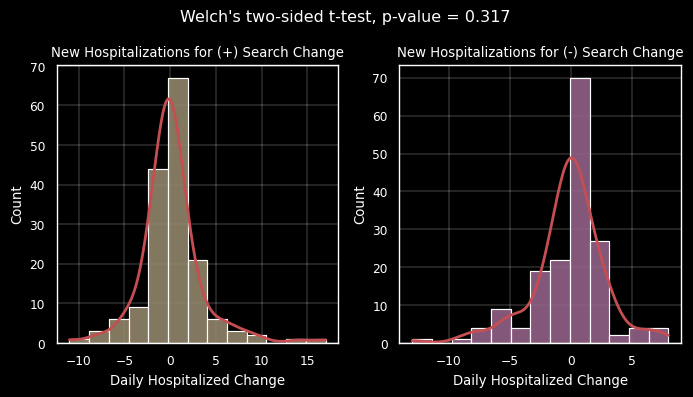

pvalue = 0.3


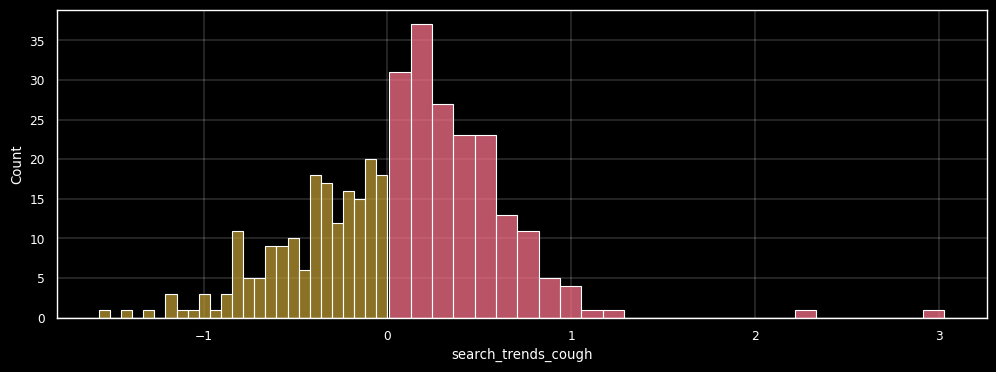

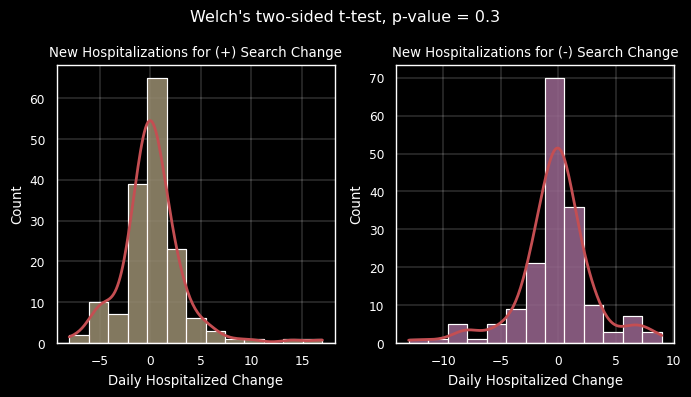

pvalue = 0.189


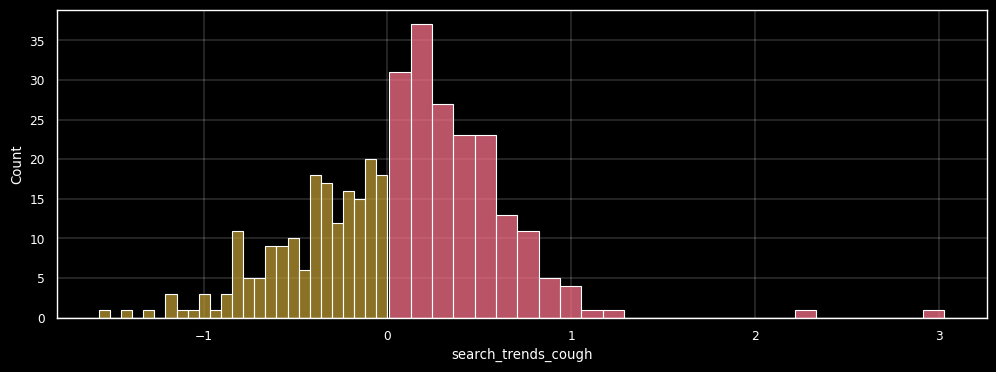

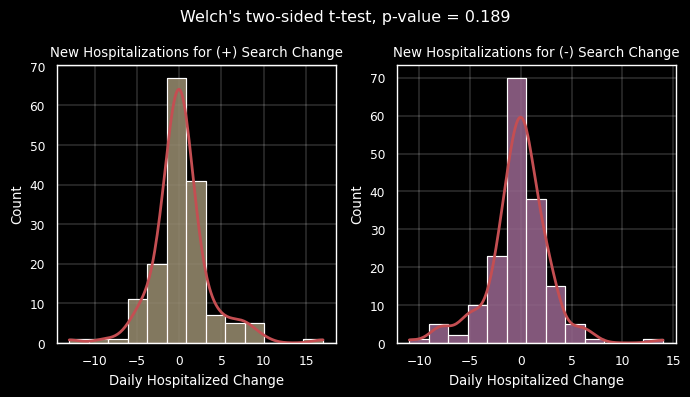

pvalue = 0.49


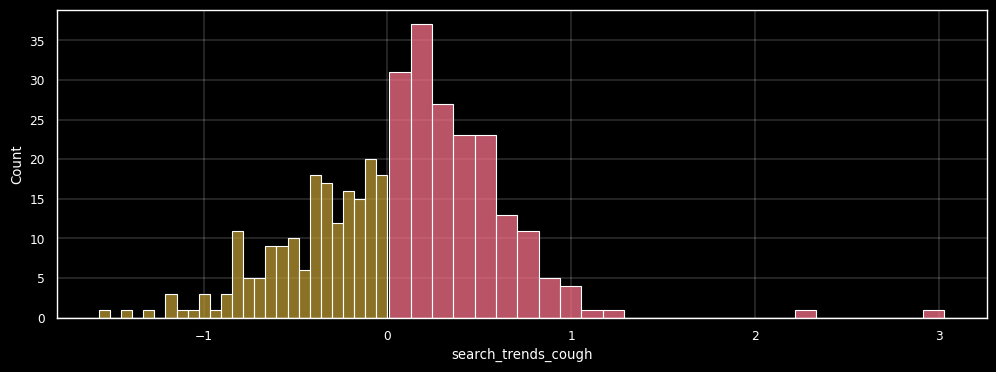

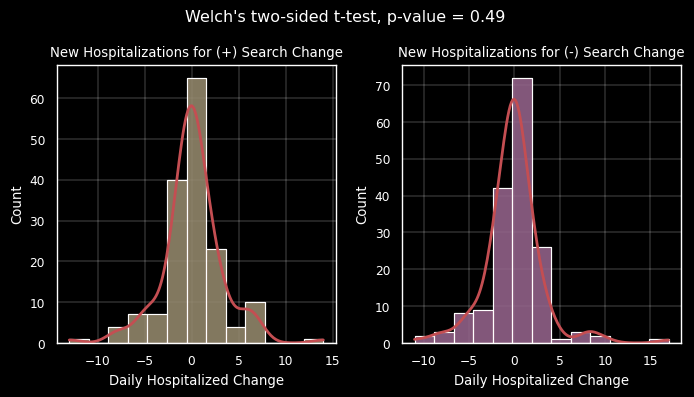

pvalue = 0.448


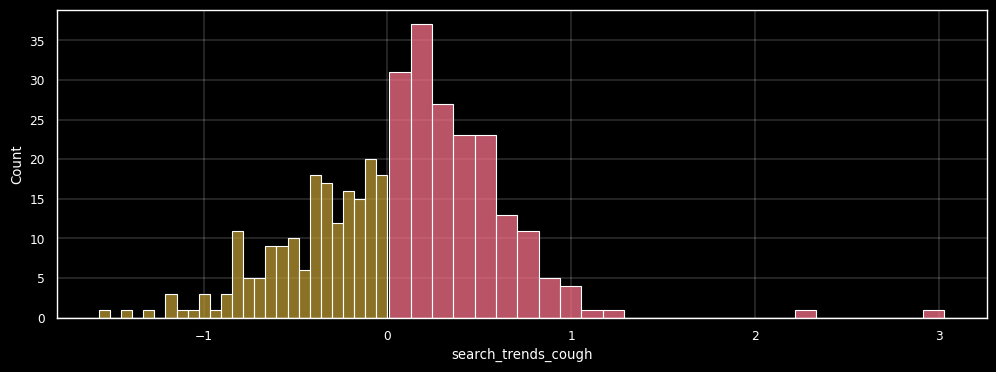

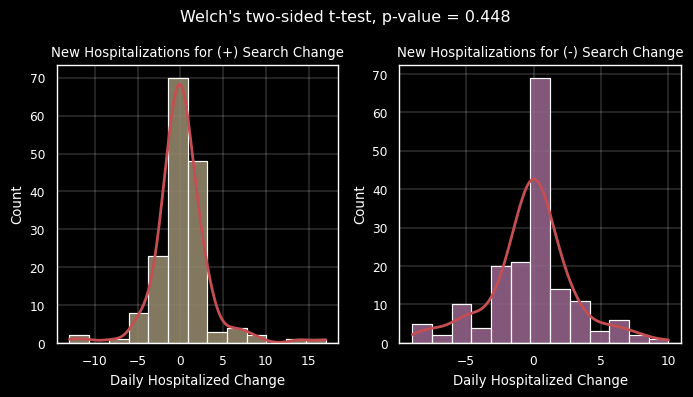

pvalue = 0.89


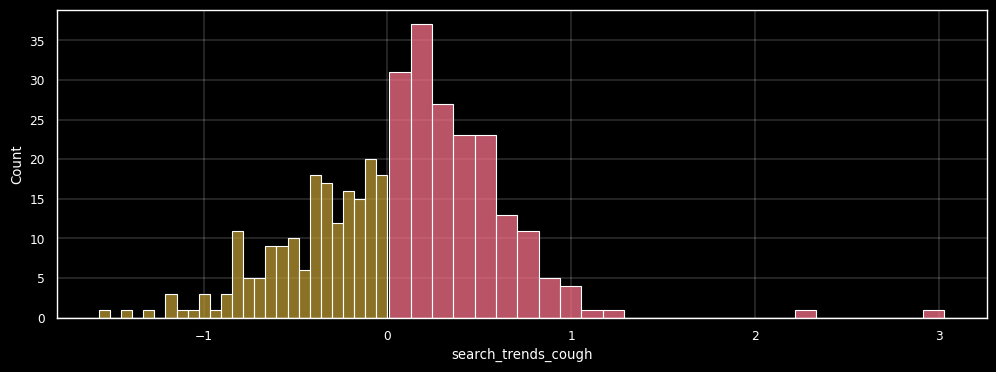

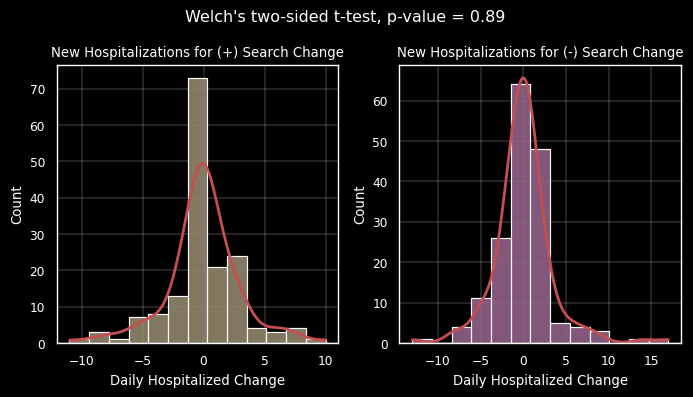

pvalue = 0.512


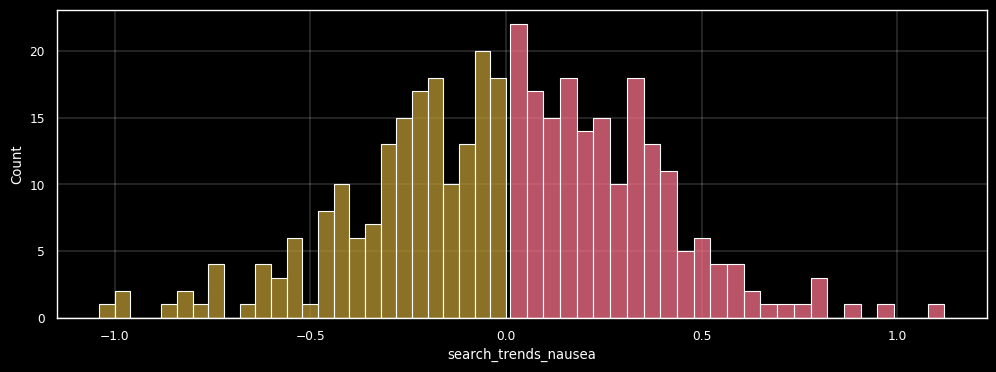

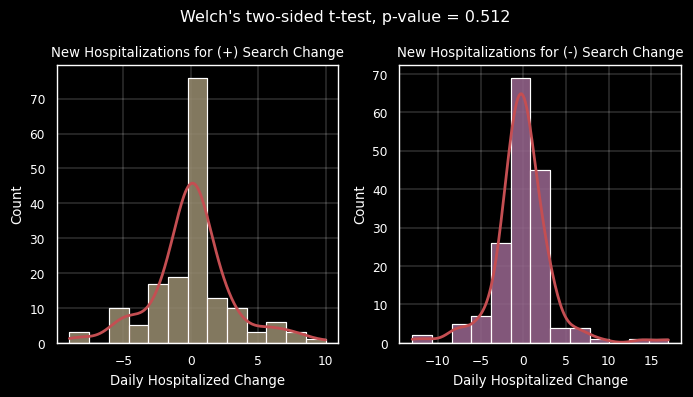

pvalue = 0.89


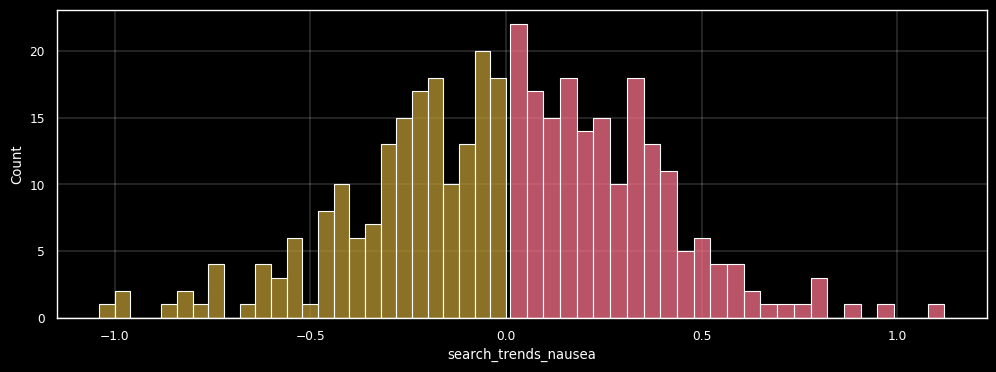

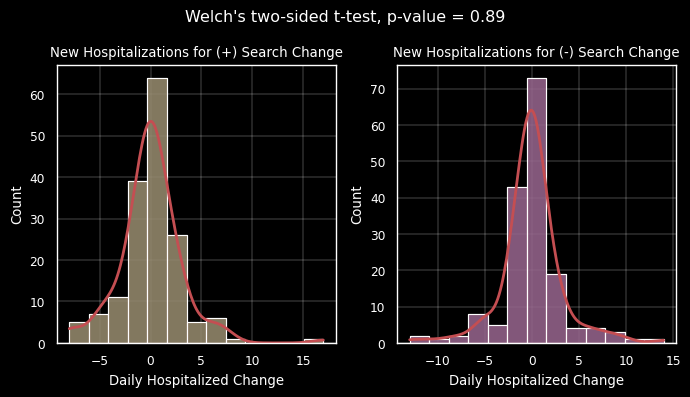

pvalue = 0.407


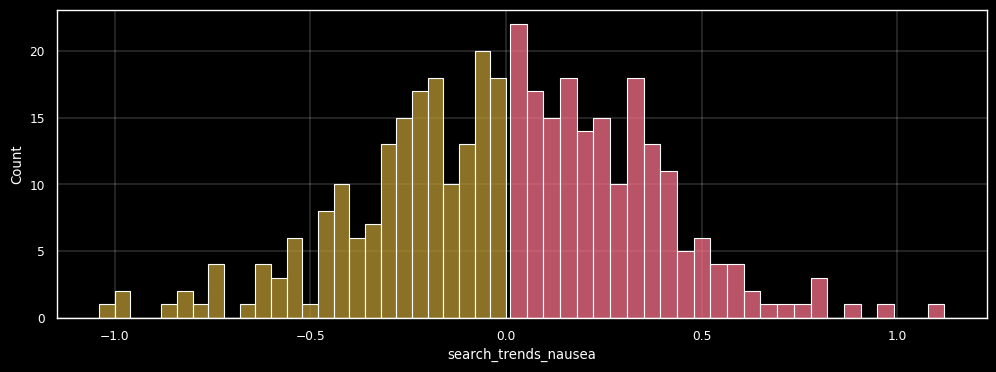

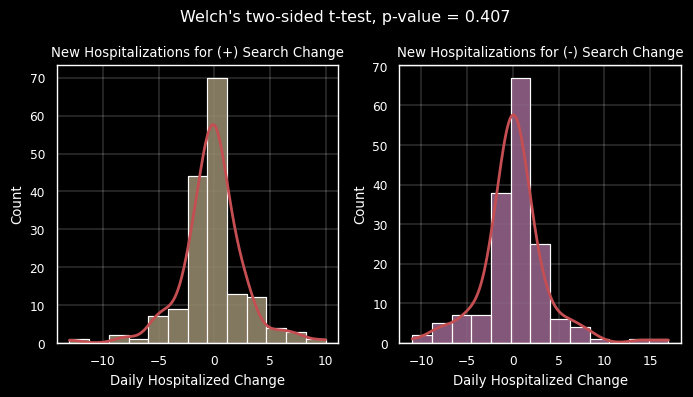

pvalue = 0.157


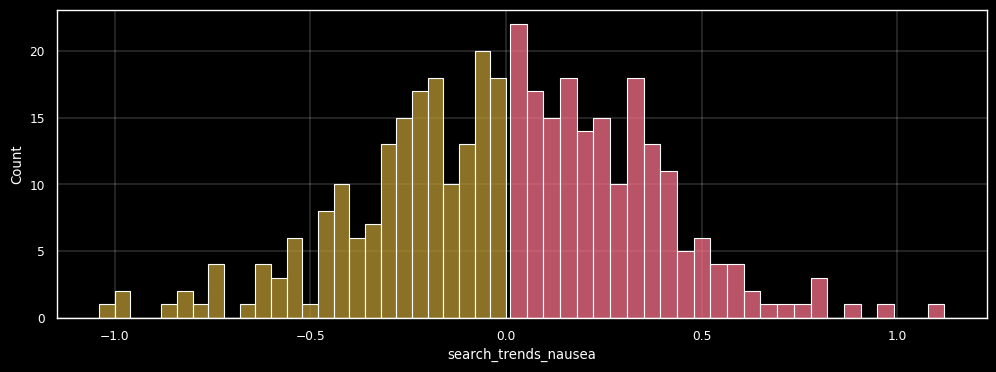

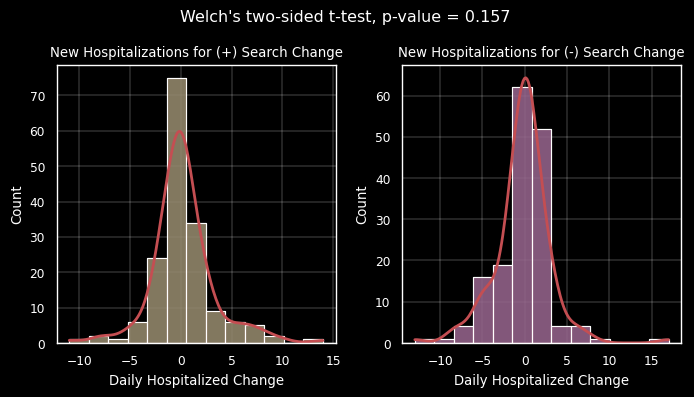

pvalue = 0.89


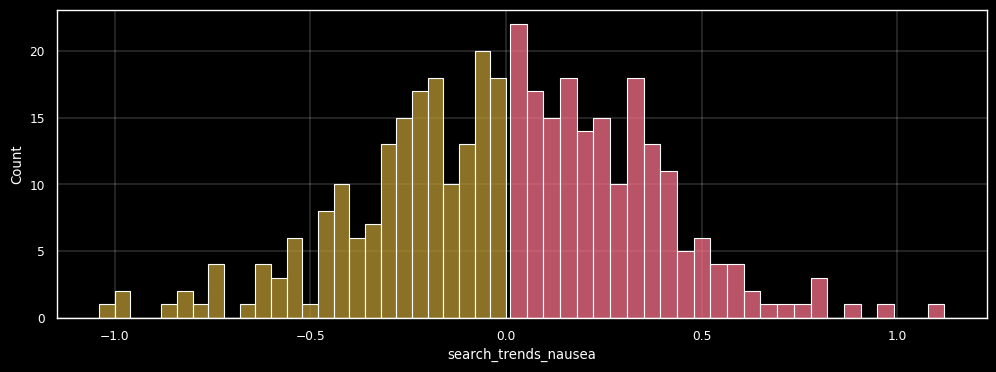

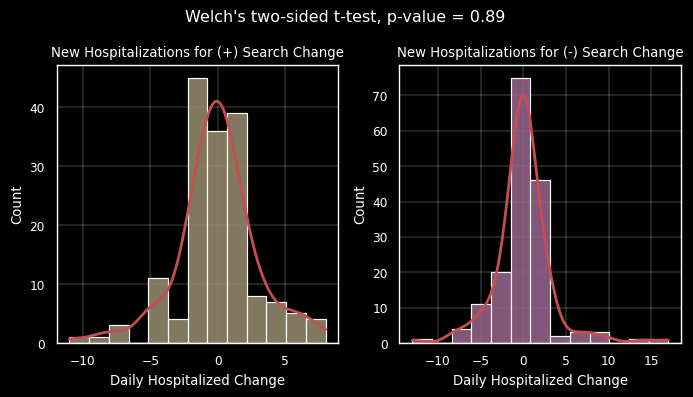

pvalue = 0.468


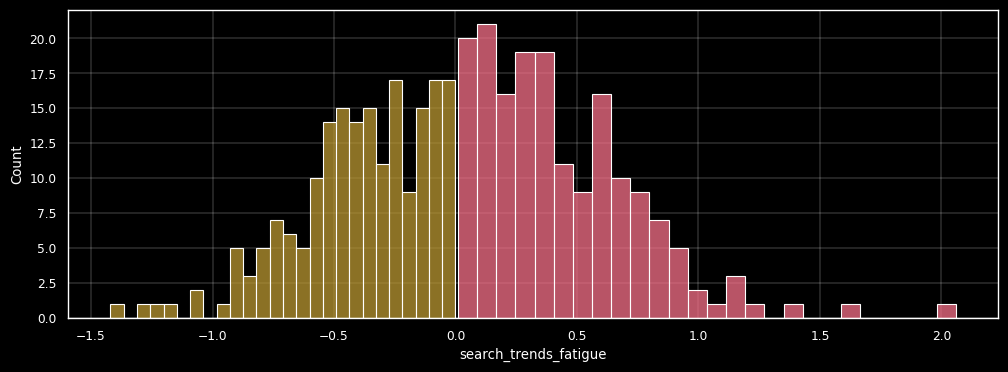

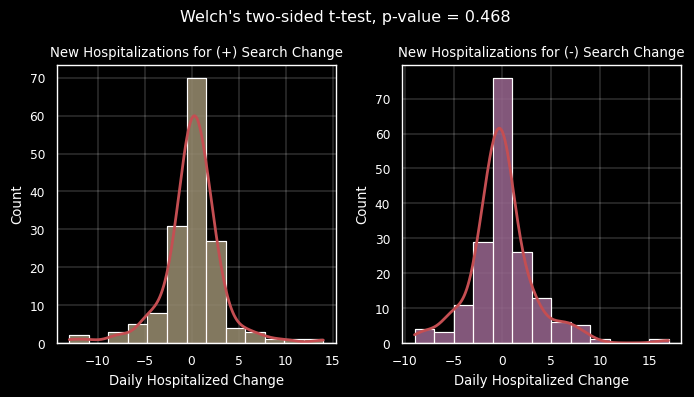

pvalue = 0.022


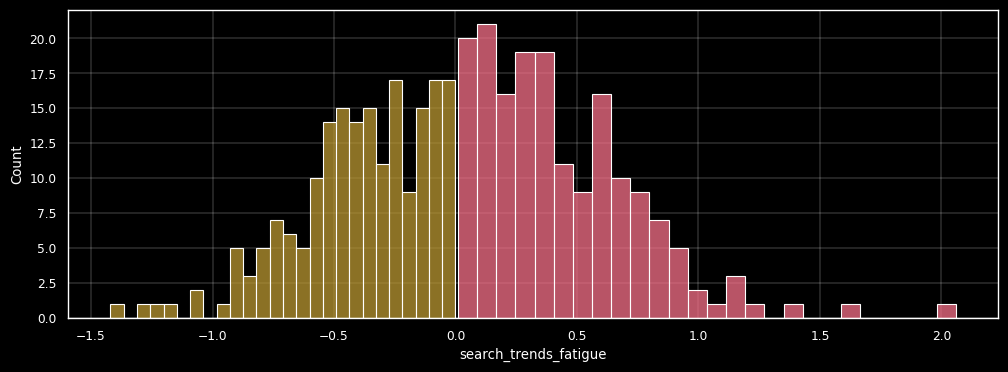

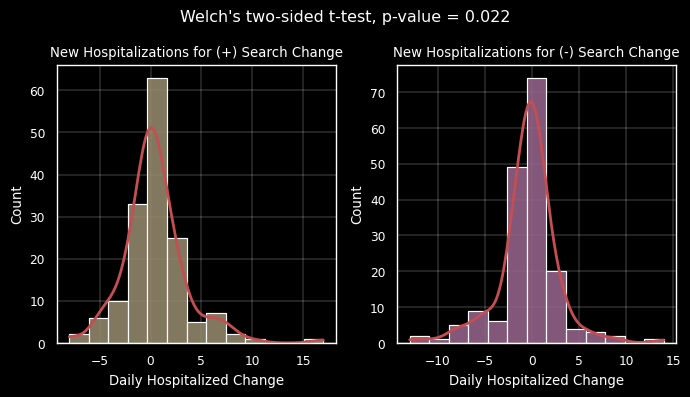

pvalue = 0.628


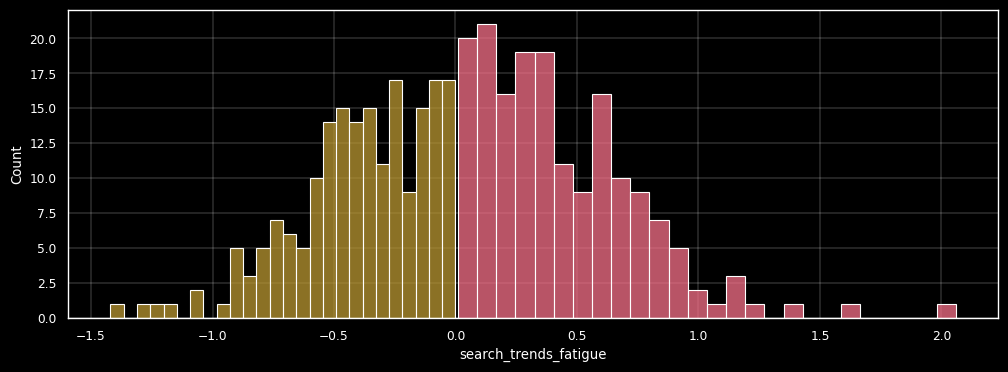

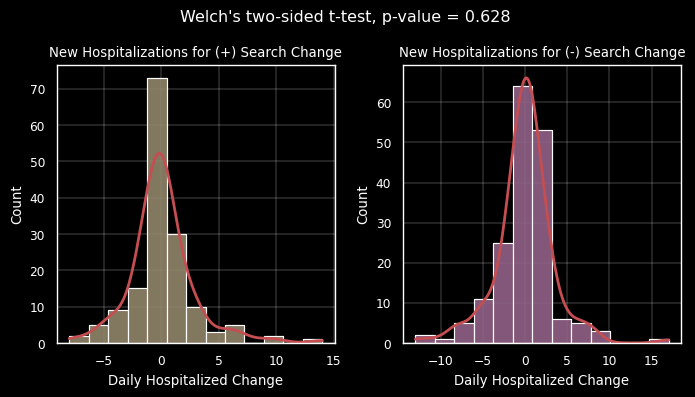

pvalue = 0.156


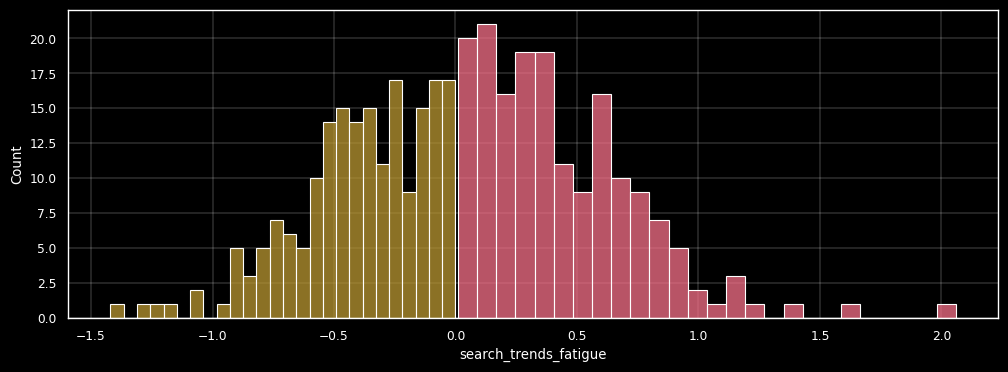

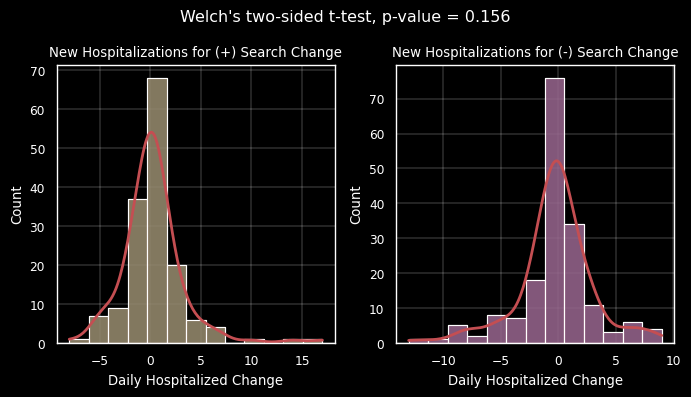

pvalue = 0.387


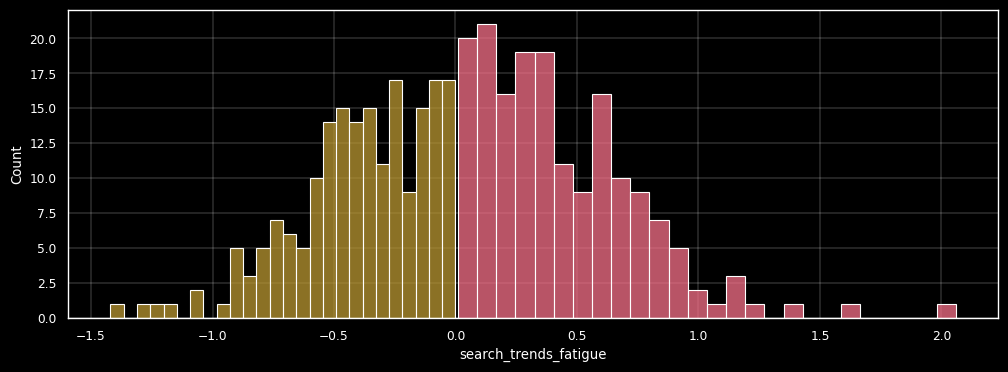

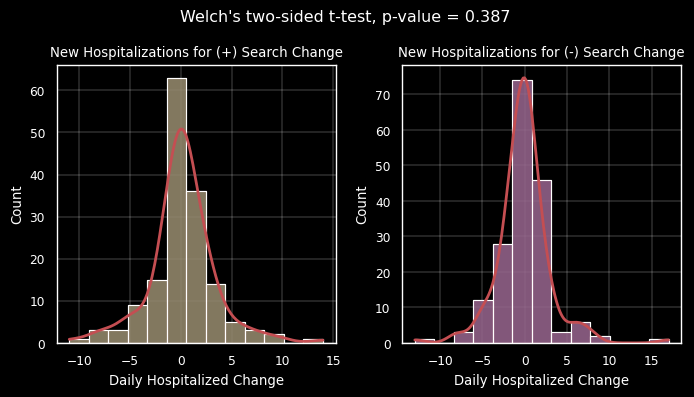

pvalue = 0.269


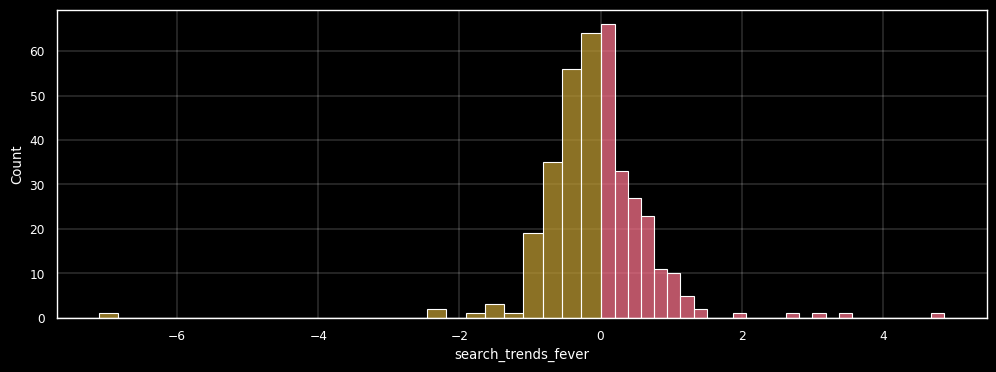

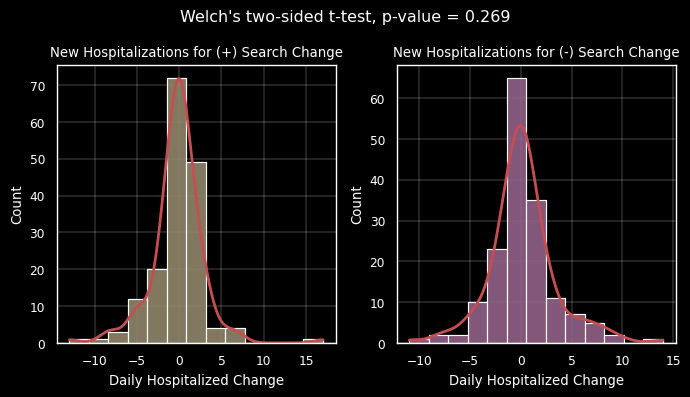

pvalue = 0.269


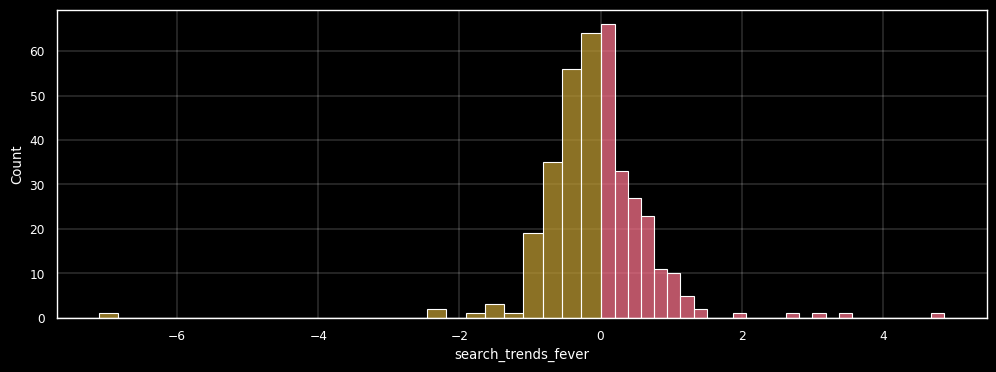

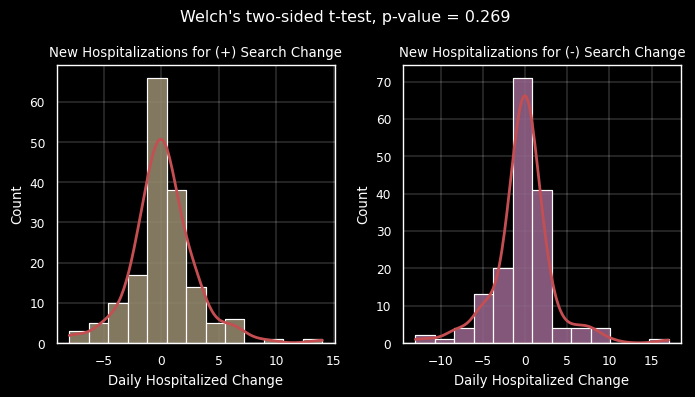

pvalue = 0.73


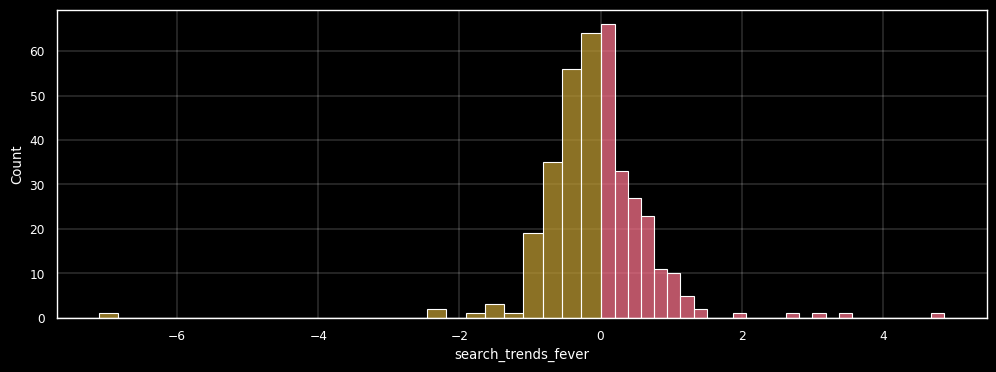

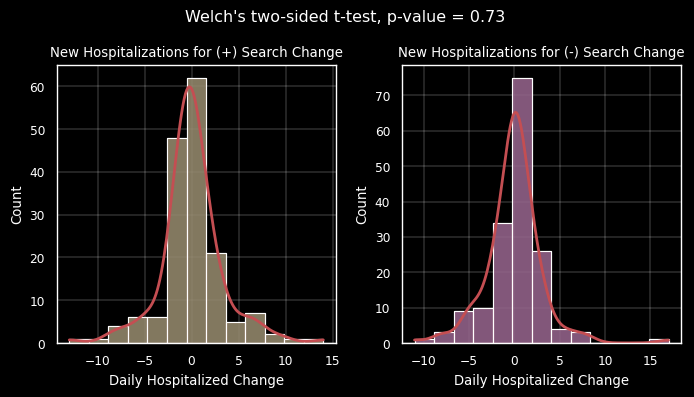

pvalue = 0.535


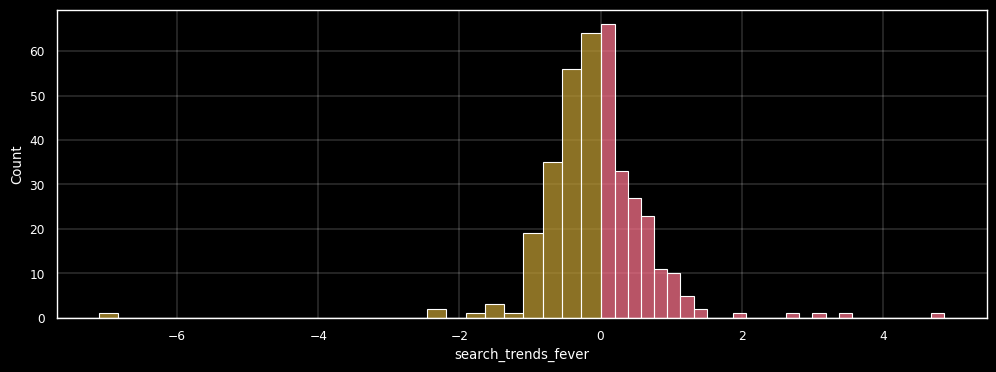

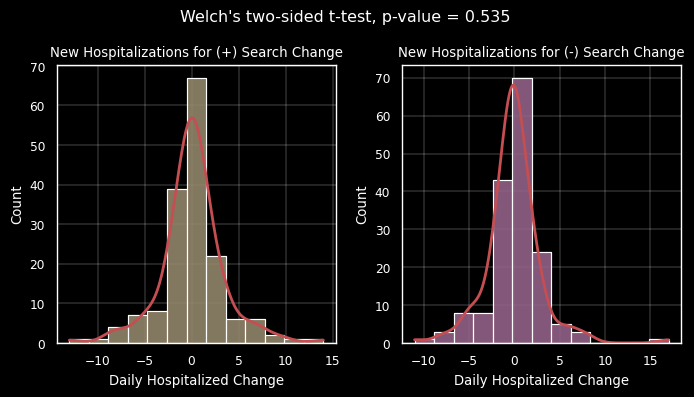

pvalue = 0.001


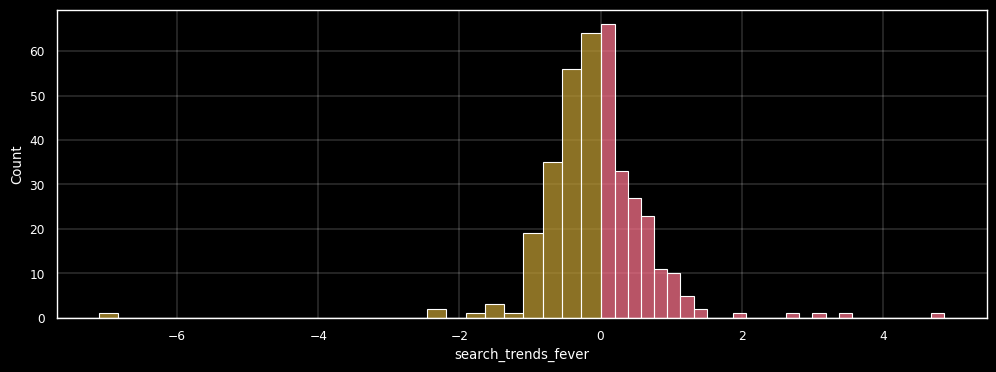

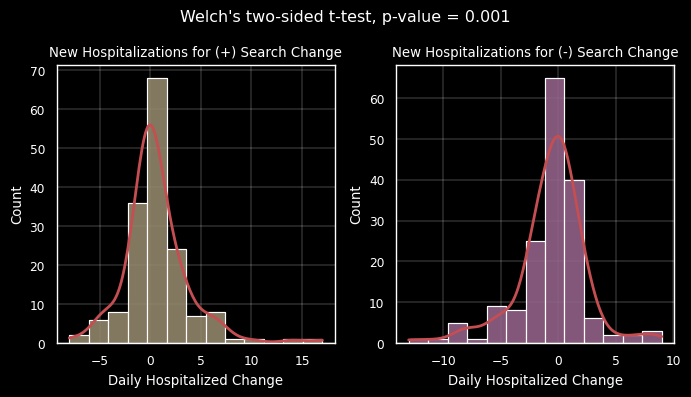

NYC p-values = [0.386, 0.597, 0.789, 0.96, 0.962, 0.801, 0.588, 0.499, 0.071, 0.402, 0.014, 0.005, 0.138, 0.12, 0.955, 0.0, 0.001, 0.011, 0.003, 0.004, 0.0, 0.001, 0.0, 0.006, 0.332]
AK p-values = [0.836, 0.084, 0.535, 0.388, 0.317, 0.3, 0.189, 0.49, 0.448, 0.89, 0.512, 0.89, 0.407, 0.157, 0.89, 0.468, 0.022, 0.628, 0.156, 0.387, 0.269, 0.269, 0.73, 0.535, 0.001]


In [4]:
date_rng = (datetime.strptime('2020-02-01', '%Y-%m-%d'), datetime.strptime('2021-02-1', '%Y-%m-%d'))
regions = ['US_NY_NYC','US_AK']

symptoms = ['search_trends_sore_throat', 'search_trends_cough', 'search_trends_nausea', 'search_trends_fatigue', 'search_trends_fever']

delays = [0,7,14,21,28]
#US_NY_NYC # New York City
save = True

pvals_NY = []
pvals_AK = []

for region in regions:
    for symptom in symptoms:
        for delay in delays:
            pval = params_to_pval(date_rng,symptom,delay,region,save)
            if region == regions[0]:
                pvals_NY.append(pval)
            else:
                pvals_AK.append(pval)
print(f'NYC p-values = {pvals_NY}')
print(f'AK p-values = {pvals_AK}')

[[0.386 0.597 0.789 0.96  0.962]
 [0.801 0.588 0.499 0.071 0.402]
 [0.014 0.005 0.138 0.12  0.955]
 [0.    0.001 0.011 0.003 0.004]
 [0.    0.001 0.    0.006 0.332]]
[[0.836 0.084 0.535 0.388 0.317]
 [0.3   0.189 0.49  0.448 0.89 ]
 [0.512 0.89  0.407 0.157 0.89 ]
 [0.468 0.022 0.628 0.156 0.387]
 [0.269 0.269 0.73  0.535 0.001]]


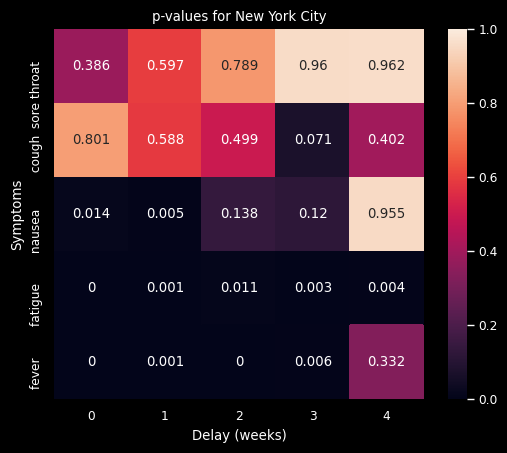

In [39]:
# pvals_NY
# pvals_AK

NY_arr = np.array(pvals_NY).reshape(5,5)
AK_arr = np.array(pvals_AK).reshape(5,5)
print(NY_arr)
print(AK_arr)

# mask = np.zeros_like(NY_arr)
# mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = .7)
plt.style.use("dark_background")
sns.set_context("paper")
fig = plt.figure()
ax = sns.heatmap(NY_arr, vmax=1, square=True, annot = True, fmt='.5g',xticklabels = [int(delay/7) for delay in delays], yticklabels=[symptom.replace('search_trends','').replace('_',' ') for symptom in symptoms])
plt.xlabel('Delay (weeks)')
plt.ylabel('Symptoms')
plt.title('p-values for New York City')

plt.show()

fig.savefig('../img/pvals_' + regions[0])

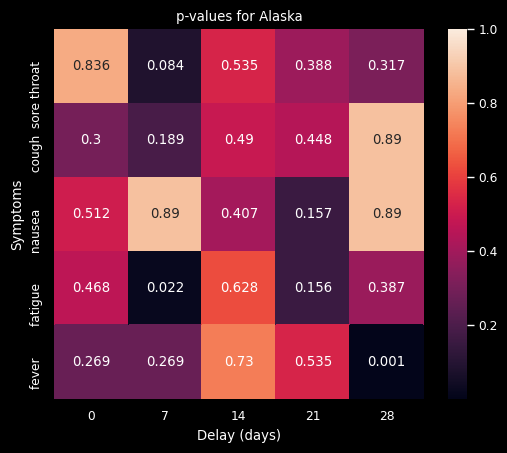

In [40]:
fig = plt.figure()
ax = sns.heatmap(AK_arr, vmax=1, square=True, annot = True, fmt='.5g',xticklabels = [int(delay/7) for delay in delays], yticklabels=[symptom.replace('search_trends','').replace('_',' ') for symptom in symptoms])
plt.xlabel('Delay (weeks)')
plt.ylabel('Symptoms')
plt.title('p-values for Alaska')

plt.show()

fig.savefig('../img/pvals_' + regions[1])